# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'
datadirectory = gitdir + '/' + 'Data/'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [6]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob

# READ FORECASTS FROM COVID HUB

In [7]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [8]:
rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [9]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub


In [10]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

Already up to date.


In [11]:
cd data-processed

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed


In [12]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Error: Can't subset columns that don't exist.
✖ Column `team` doesn't exist.
Backtrace:
     █
  1. ├─`%>%`(...)
  2. │ ├─base::withVisible(eval(quote(`_fseq`(`_lhs`)), env, env))
  3. │ └─base::eval(quote(`_fseq`(`_lhs`)), env, env)
  4. │   └─base::eval(quote(`_fseq`(`_lhs`)), env, env)
  5. │     └─`_fseq`(`_lhs`)
  6. │       └─magrittr::freduce(value, `_function_list`)
  7. │         └─function_list[[i]](value)
  8. │           ├─dplyr::select(...)
  9. │           └─dplyr:::select.data.frame(...)
 10. │             └─tidyselect::vars_select(tbl_vars(.data), !!!enquos(...))
 11. │               └─tidyselect:::eval_select_impl(...)
 12. │                 ├─tidyselect:::with_subscript_errors(...)
 13. │                 │ ├─base::tryCatch(...)
 14. 
Execution halted


In [13]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, datadirectory)

In [14]:
# os.chdir(mypwd[0])

# files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
# for file in files:
#     if os.path.isfile(file):
#         shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(datadirectory)        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

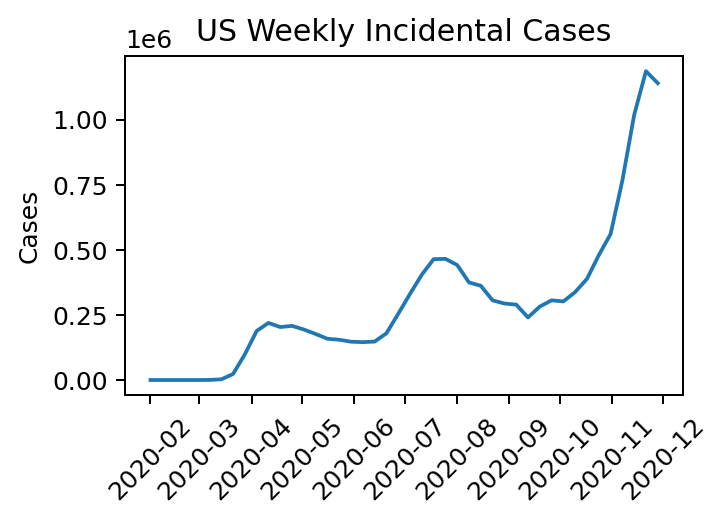

In [15]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases,figuresdirectory)

In [16]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')
FirstForecasts.to_pickle('../Data/ModelsANDForecasts.pkl')

100%|██████████| 3076/3076 [08:59<00:00,  5.70it/s]


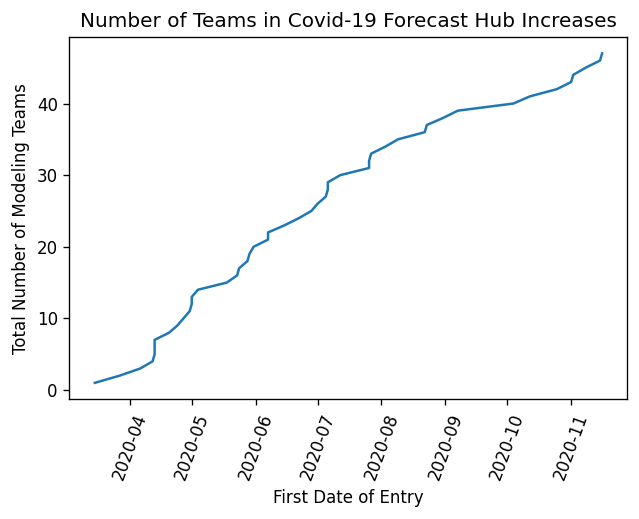

In [17]:
FirstForecasts = pd.read_pickle('../Data/ModelsANDForecasts.pkl')
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

In [18]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')

In [19]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [20]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

Maximum % conversion error:
2.2265654794189182
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. JHU_IDD:CovidSP
3. IowaStateLW:STEM
4. Covid19Sim:Simulator
5. UCLA:SuEIR
6. Columbia_UNC:SurvCon
7. CovidAnalytics:DELPHI
8. USACE:ERDC_SEIR
9. RobertWalraven:ESG
10. LNQ:ens1
11. IHME:CurveFit
12. COVIDhub:ensemble
13. Karlen:pypm
14. DDS:NBDS
15. CU:nochange
16. CU:select
17. CU:scenario_mid
18. CU:scenario_high
19. CU:scenario_low
20. CEID:Walk
21. JHUAPL:Bucky
22. BPagano:RtDriven
23. JHU_CSSE:DECOM
24. USC:SI_kJalpha_RF
25. JCB:PRM
26. UChicagoCHATTOPADHYAY:UnIT
27. UCF:AEM
28. USC:SI_kJalpha
29. UMich:RidgeTfReg
30. UVA:Ensemble
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


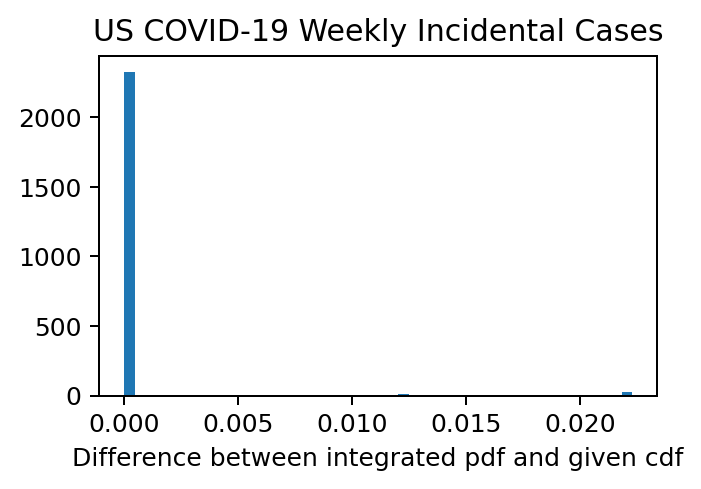

In [21]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)
ScoreboardCases.reset_index(drop=True,inplace=True)
S19.plotdifferencescdfpdf(ScoreboardCases,'Case',figuresdirectory)
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

<Figure size 1800x1200 with 0 Axes>

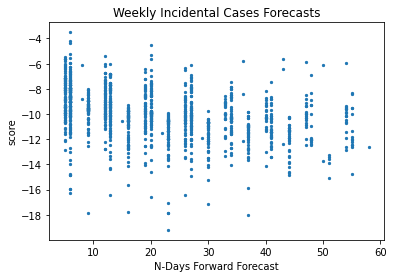

<Figure size 1800x1200 with 0 Axes>

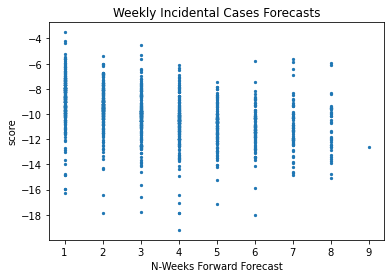

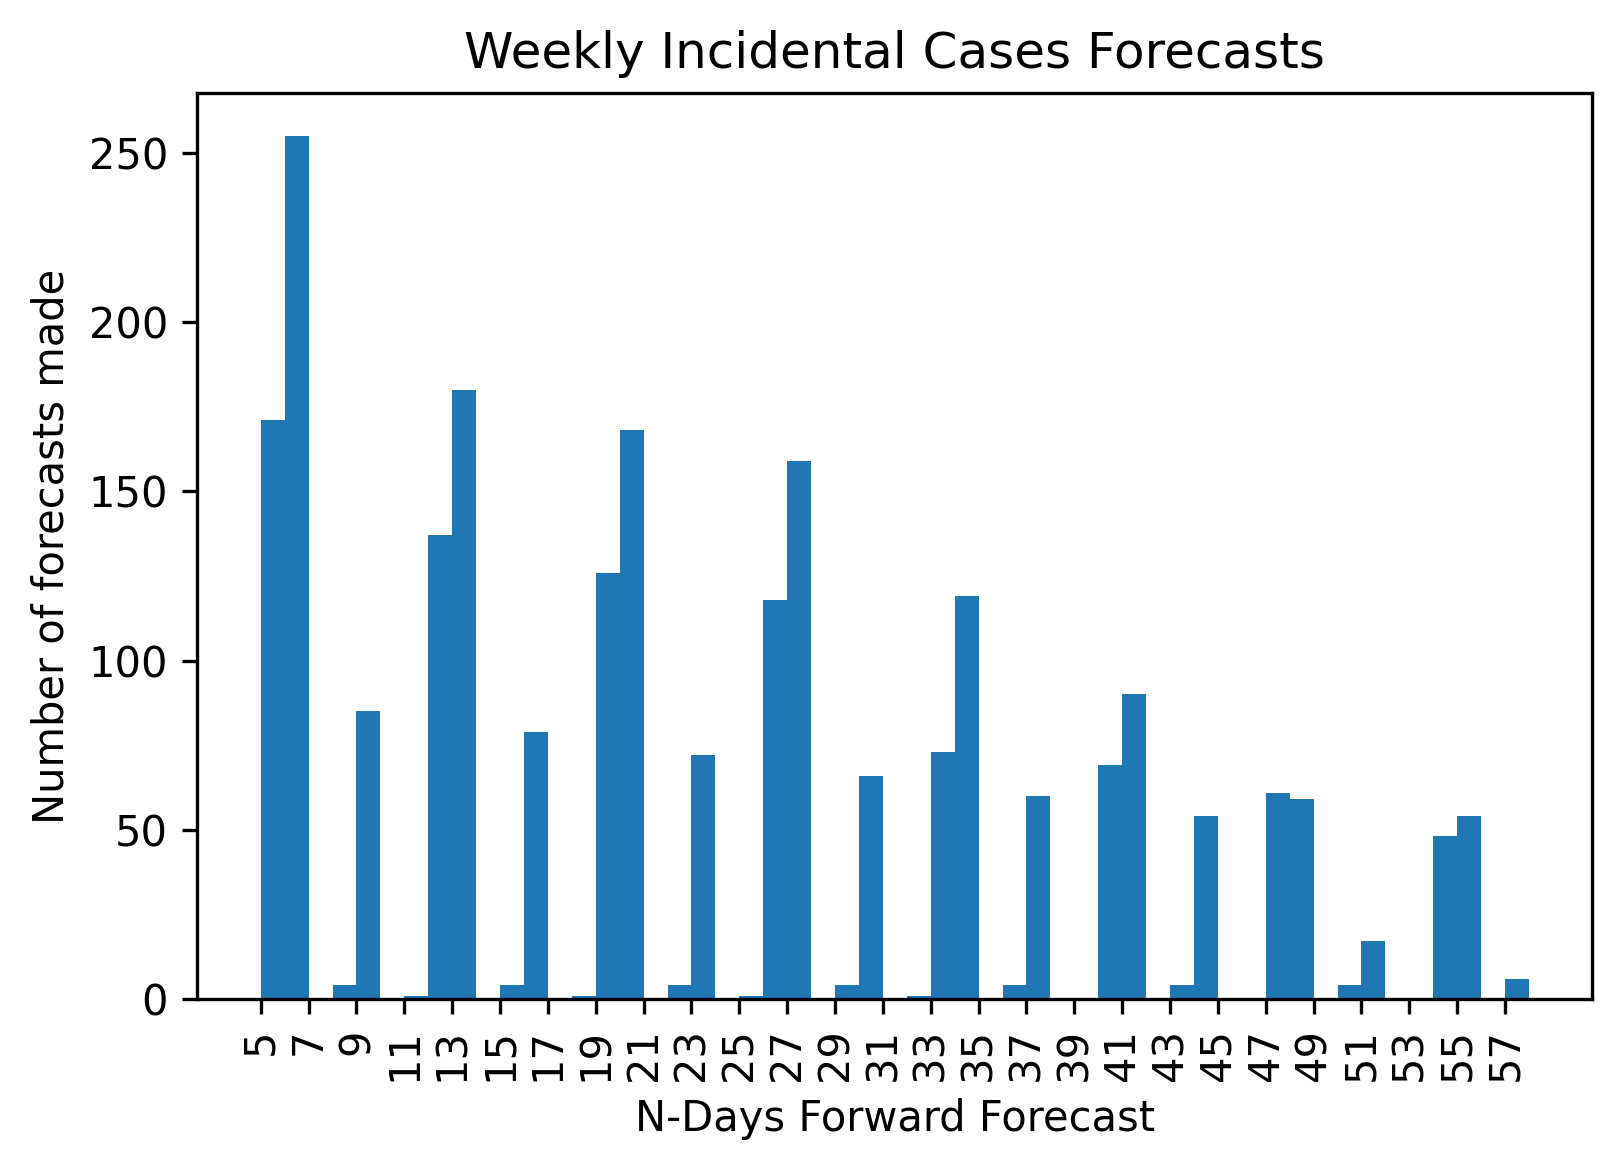

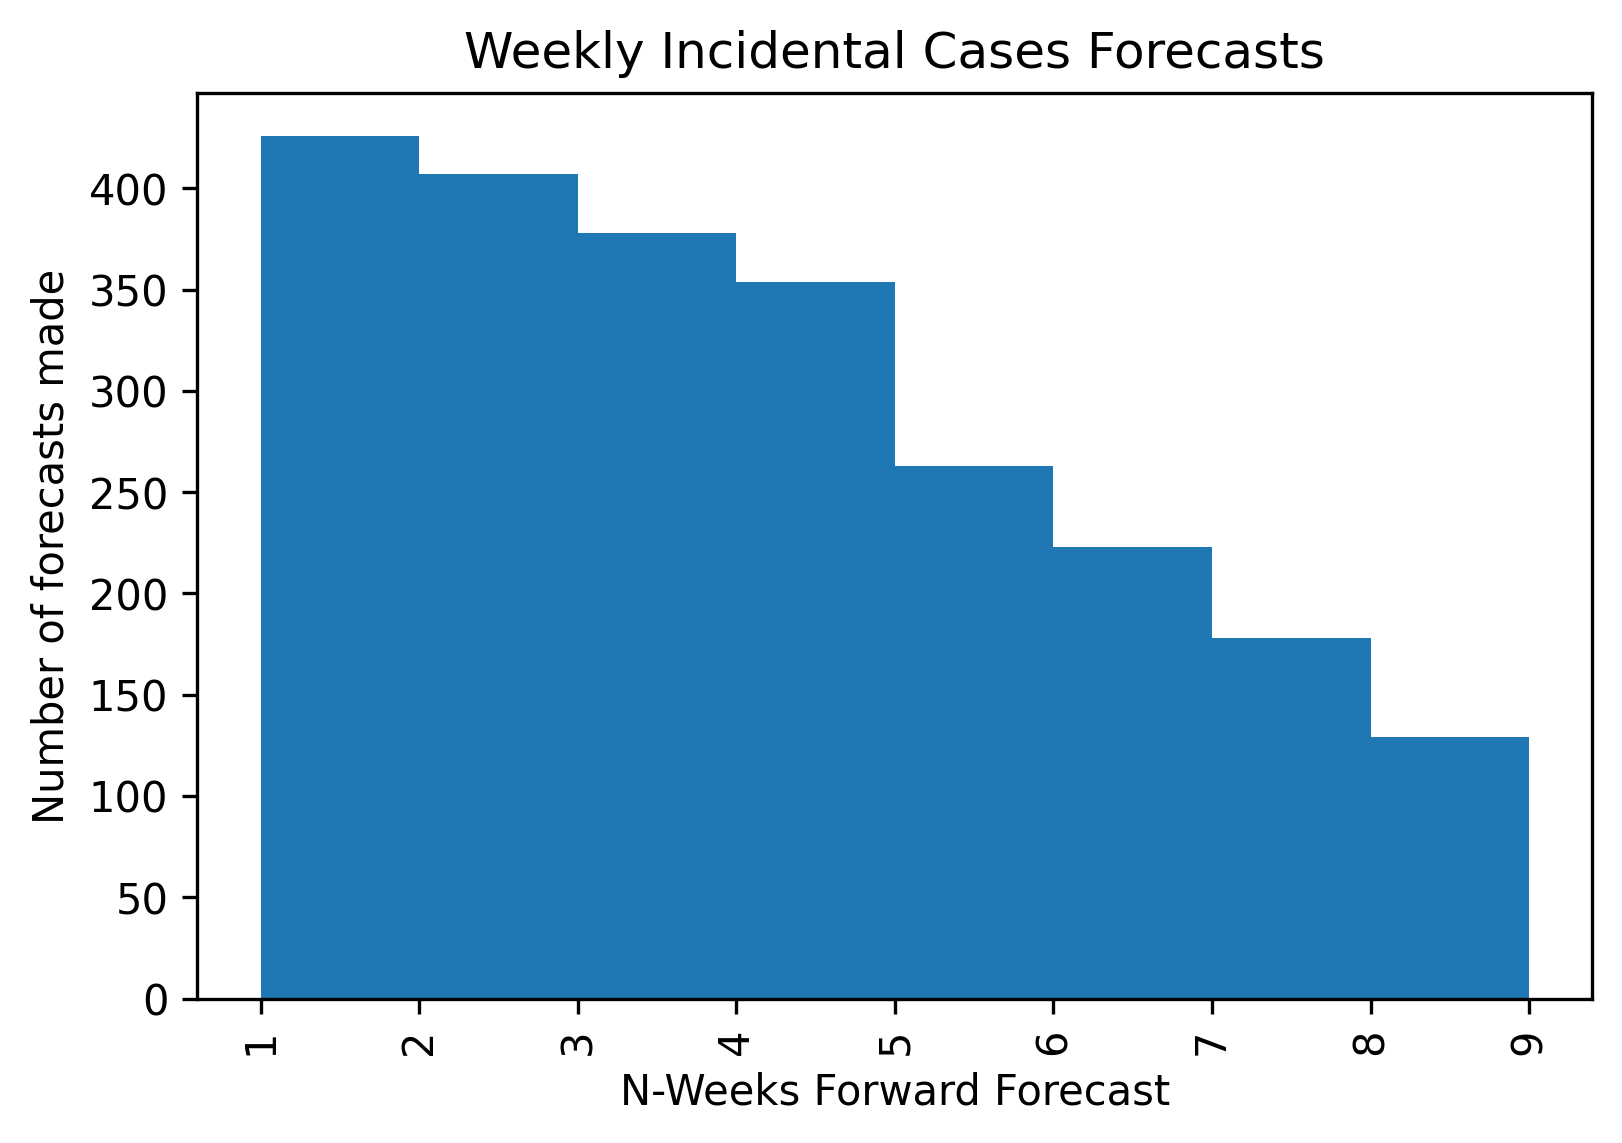

In [22]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [23]:
int(ScoreboardCases['deltaW'].max())

9

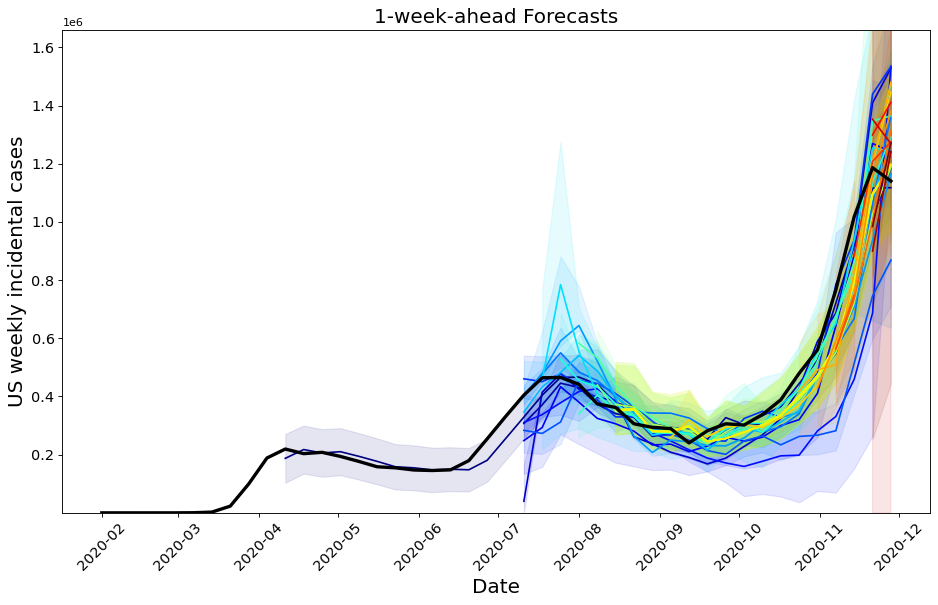

In [24]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1,figuresdirectory)

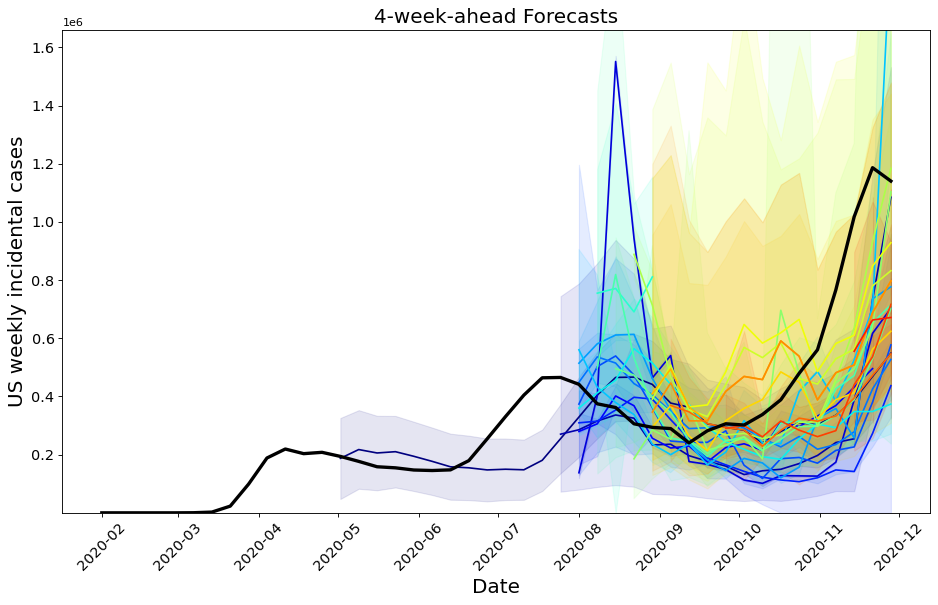

In [25]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4,figuresdirectory)

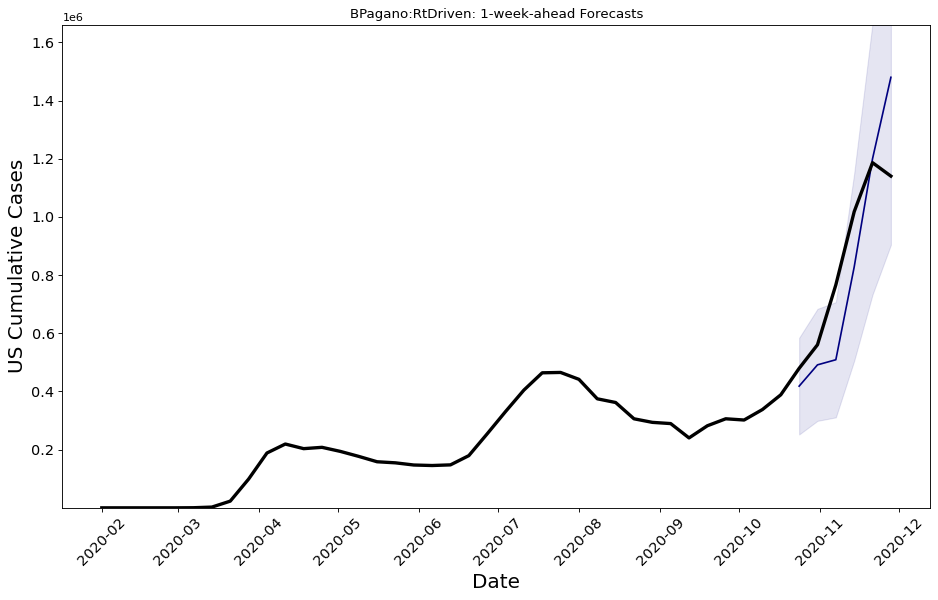

In [26]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'BPagano:RtDriven',figuresdirectory)

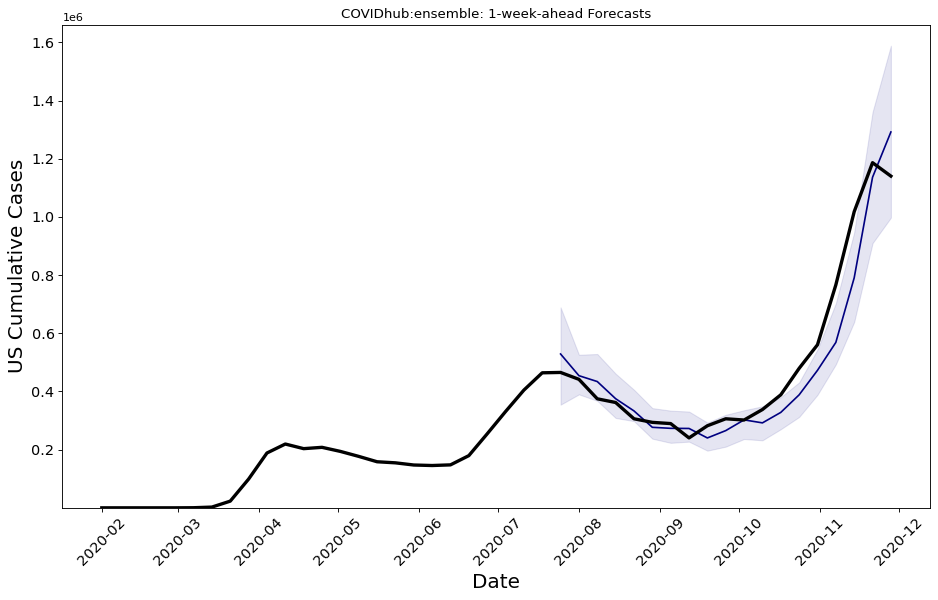

In [27]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:ensemble',figuresdirectory)

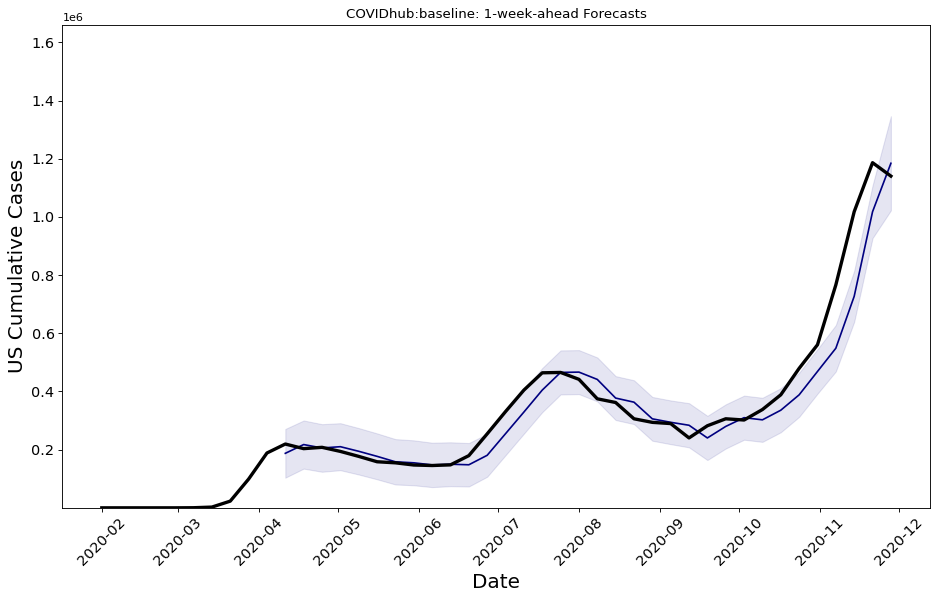

In [28]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:baseline',figuresdirectory)

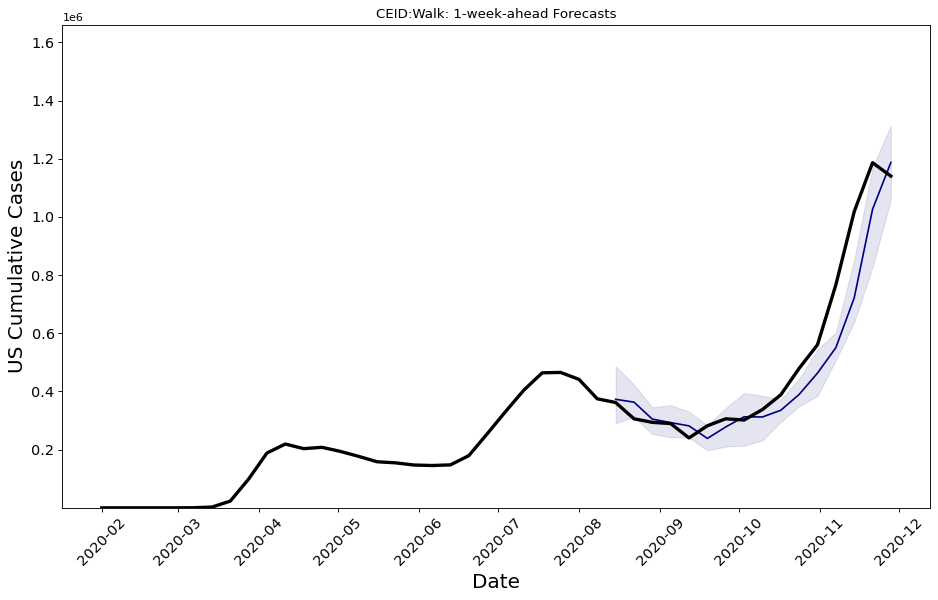

In [29]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk',figuresdirectory)

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

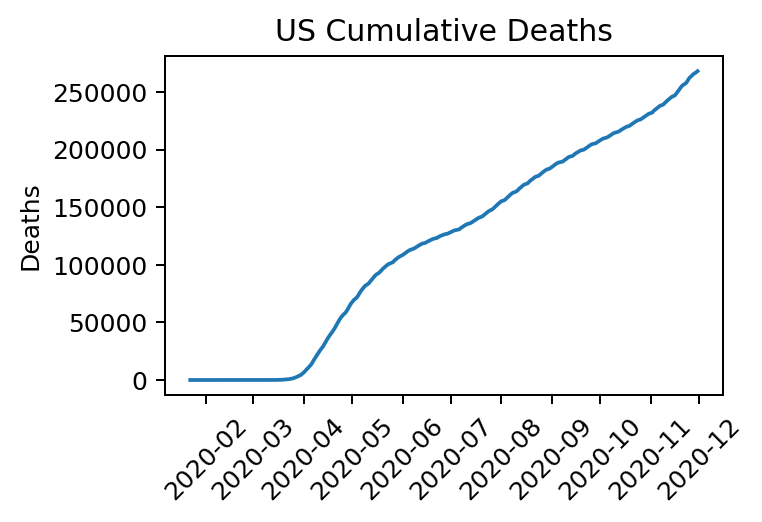

In [30]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths,figuresdirectory)

In [31]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

100%|██████████| 8123/8123 [03:44<00:00, 36.17it/s]  


In [32]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')

In [33]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [34]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
1.871678267911725
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. COVIDhub:baseline
3. CU:select
4. CU:scenario_mid
5. CU:scenario_low
6. CU:scenario_high
7. CU:nochange
8. UMass:ExpertCrowd
9. YYG:ParamSearch
10. UT:Mobility
11. JHU_IDD:CovidSP
12. COVIDhub:ensemble
13. MOBS:GLEAM_COVID
14. LANL:GrowthRate
15. CovidAnalytics:DELPHI
16. UCLA:SuEIR
17. GT:DeepCOVID
18. IHME:CurveFit
19. IowaStateLW:STEM
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. CovidActNow:SEIR_CAN
28. OliverWyman:Navigator
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. Columbia_UNC:SurvCon
33. UMich:RidgeTfReg
34. RobertWalraven:ESG
35. Karlen:pypm
36. UCM_MESALab:FoGSEIR
37. DDS:NBDS
38. RPI_UW:Mob_Collision
39. CEID:Walk
40. WalmartLabsML:LogForecasting
41. SteveMcConnell:CovidComplete
42. JHUAPL:Bucky
43. UCSD_NEU:DeepGLEAM
44. BPagano:R

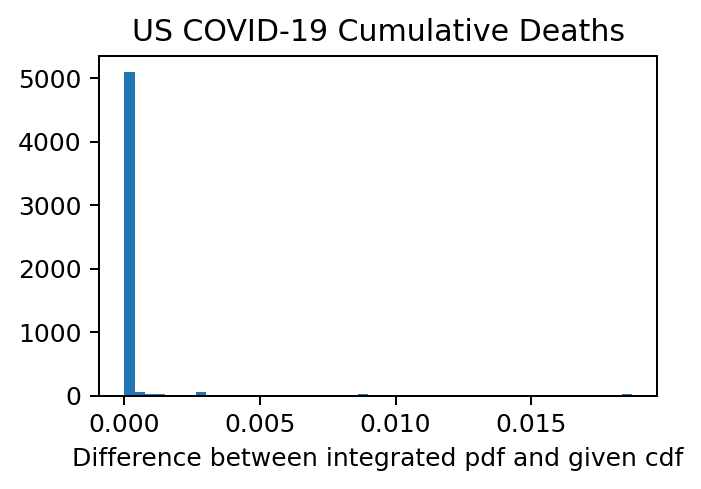

In [35]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)
ScoreboardDeaths.reset_index(drop=True,inplace=True)
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death',figuresdirectory)
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

<Figure size 1800x1200 with 0 Axes>

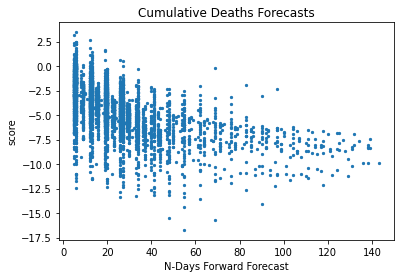

<Figure size 1800x1200 with 0 Axes>

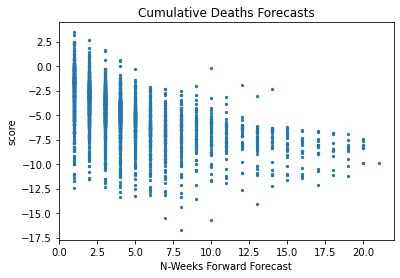

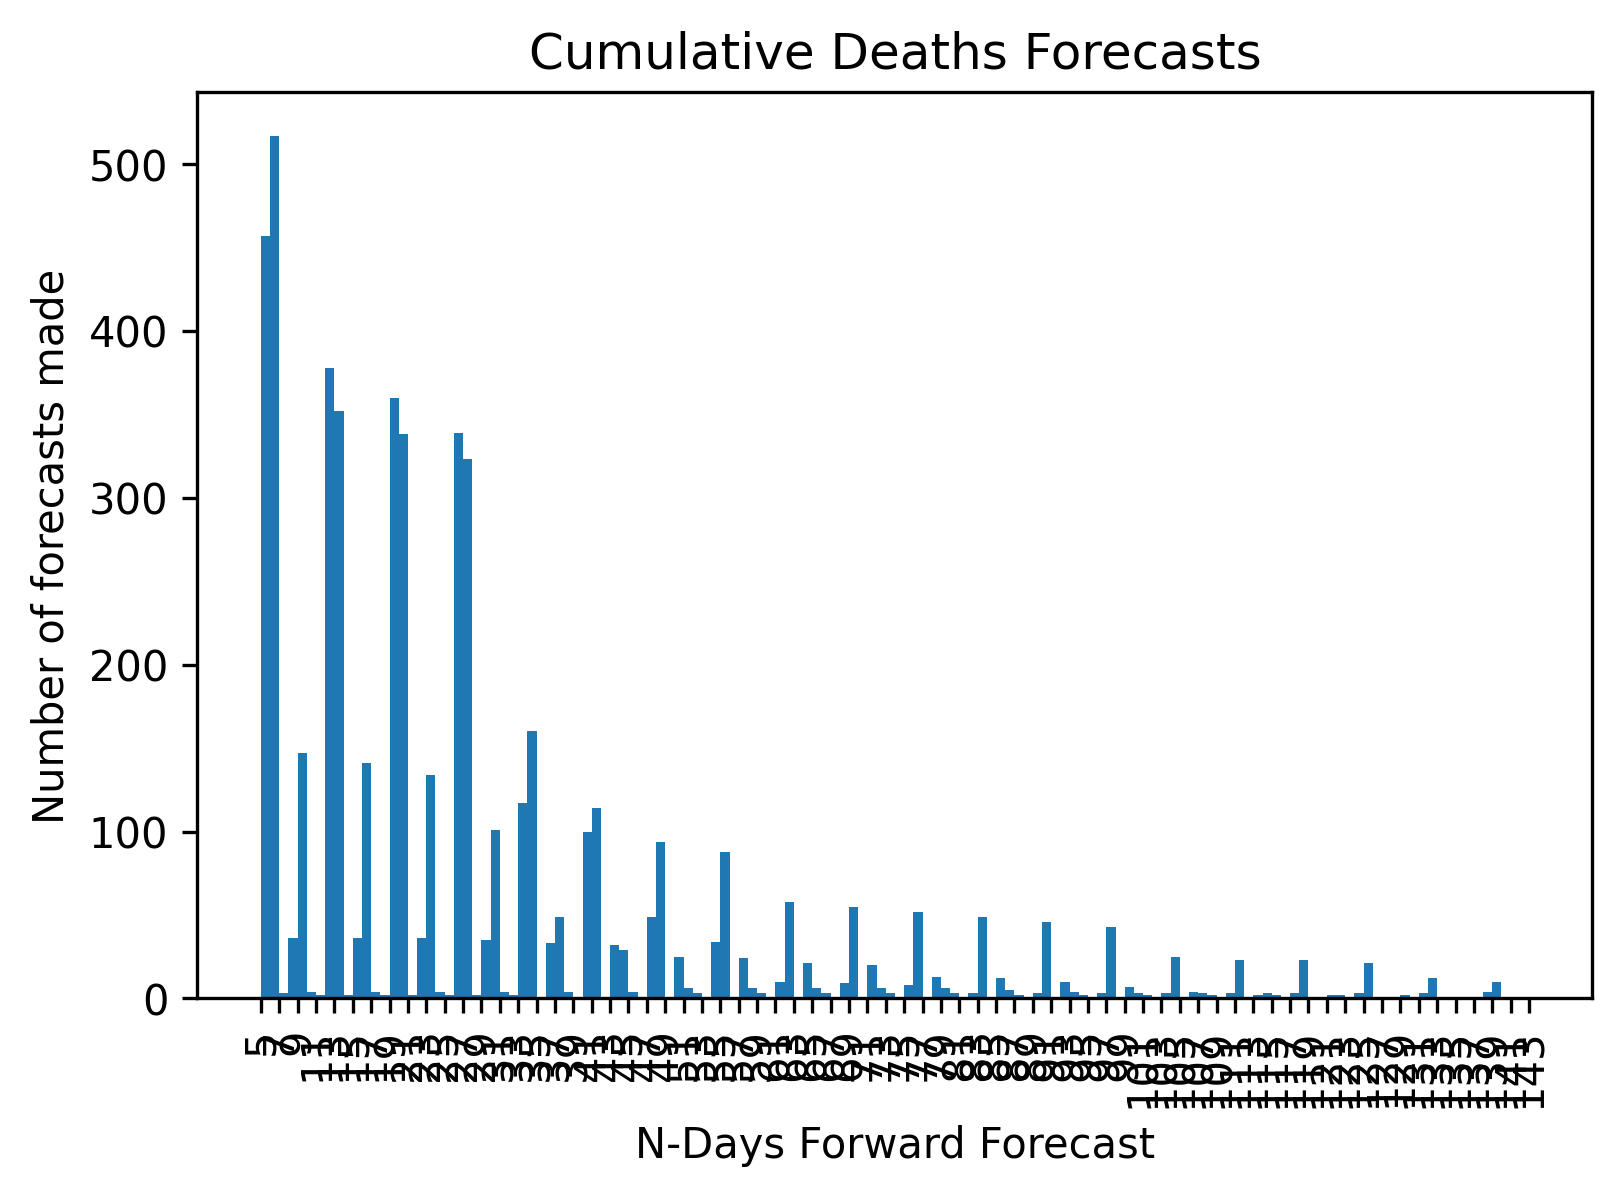

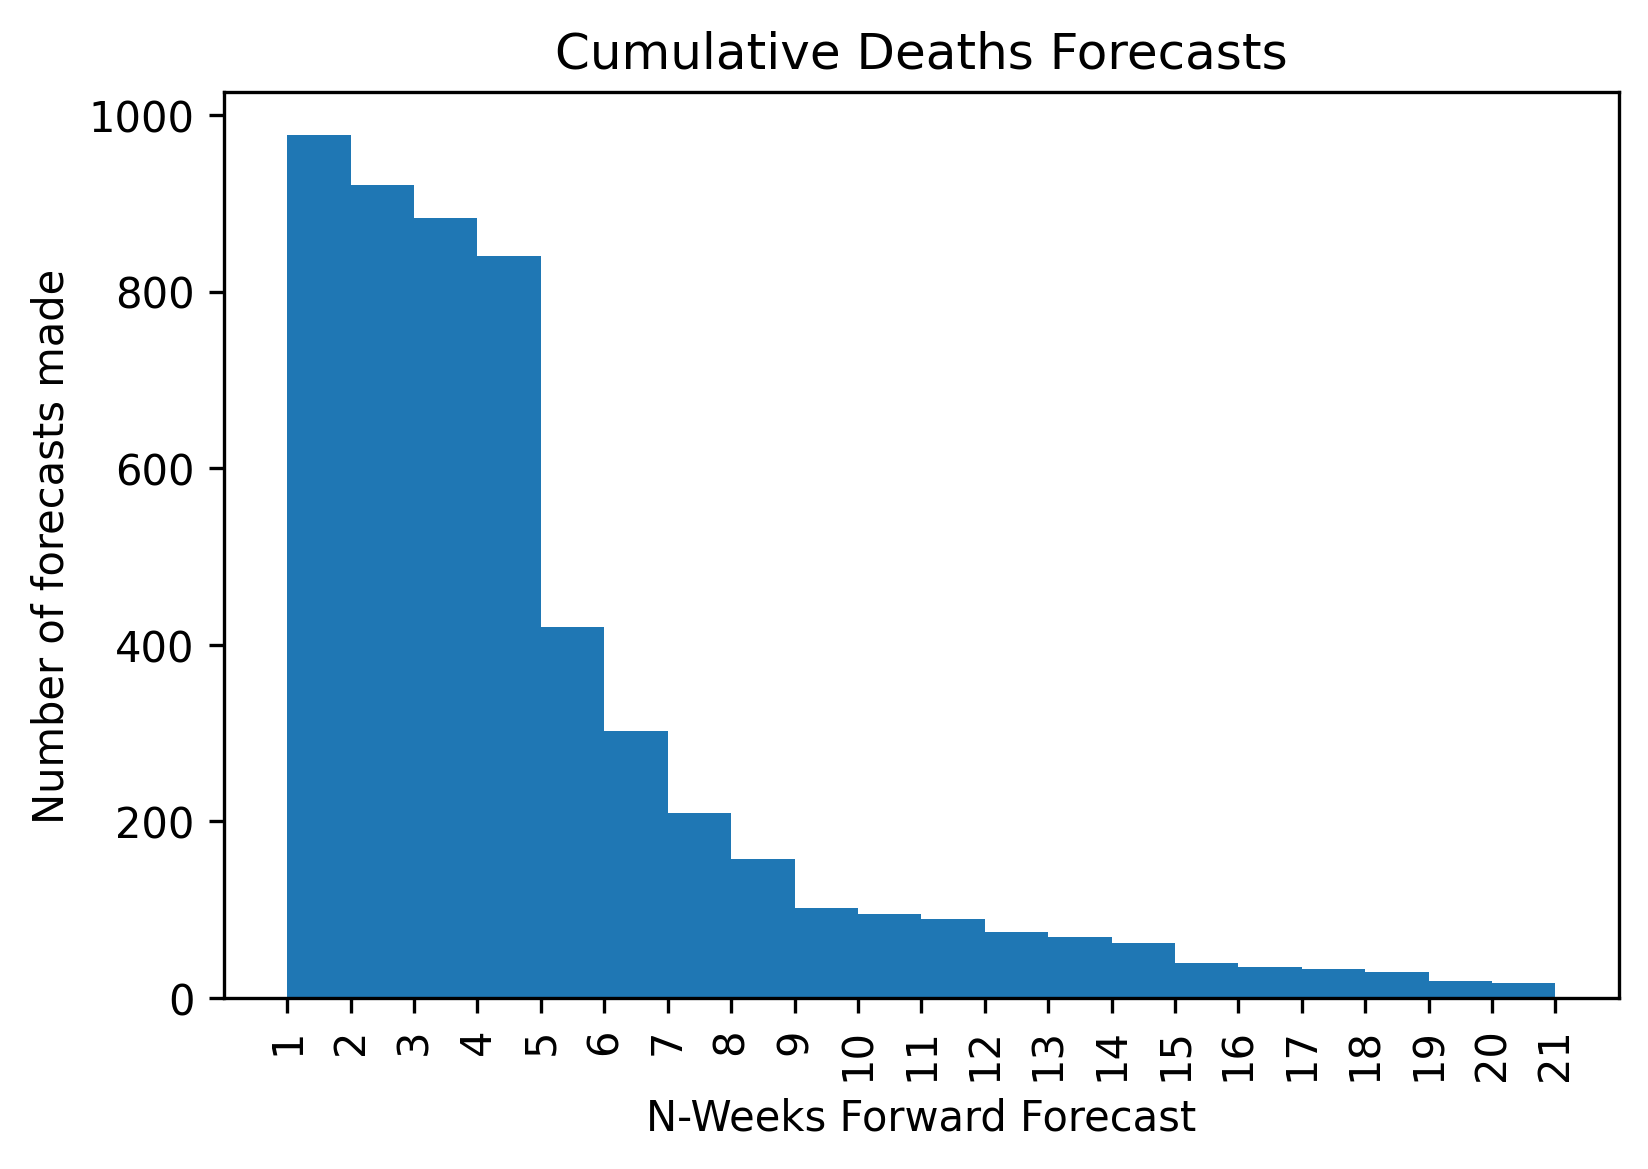

In [36]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

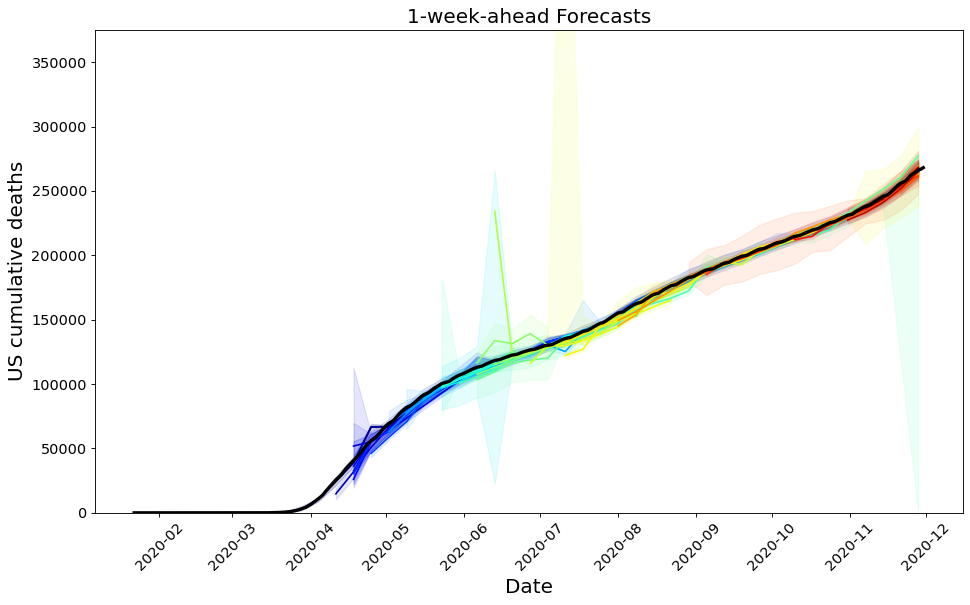

In [37]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1,figuresdirectory)

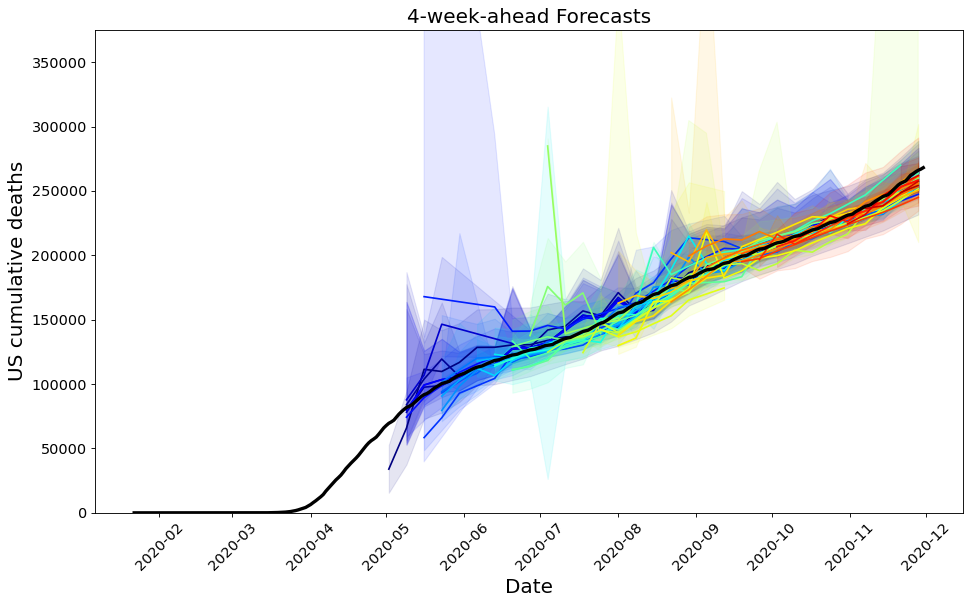

In [38]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4,figuresdirectory)

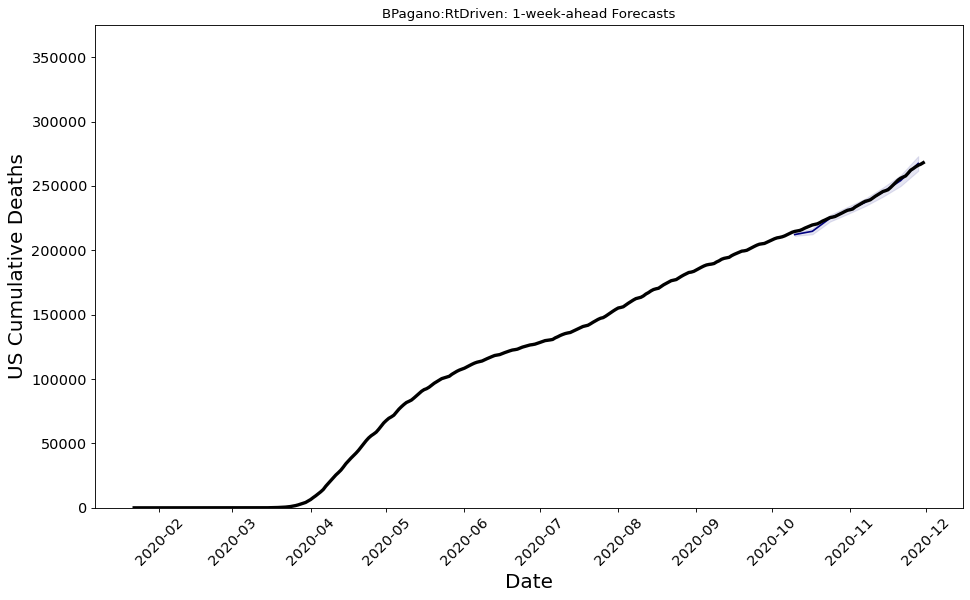

In [39]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'BPagano:RtDriven',figuresdirectory)

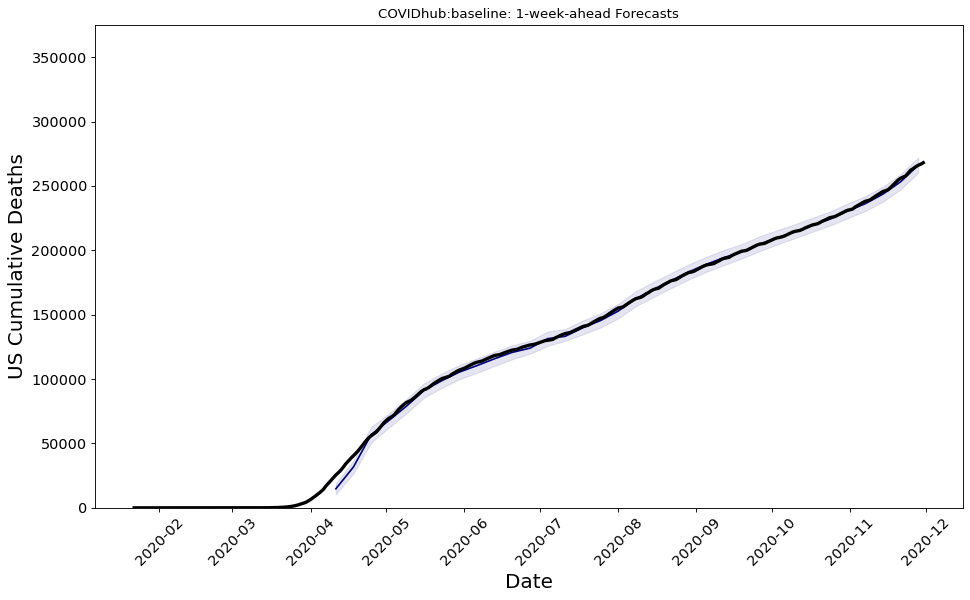

In [40]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline',figuresdirectory)

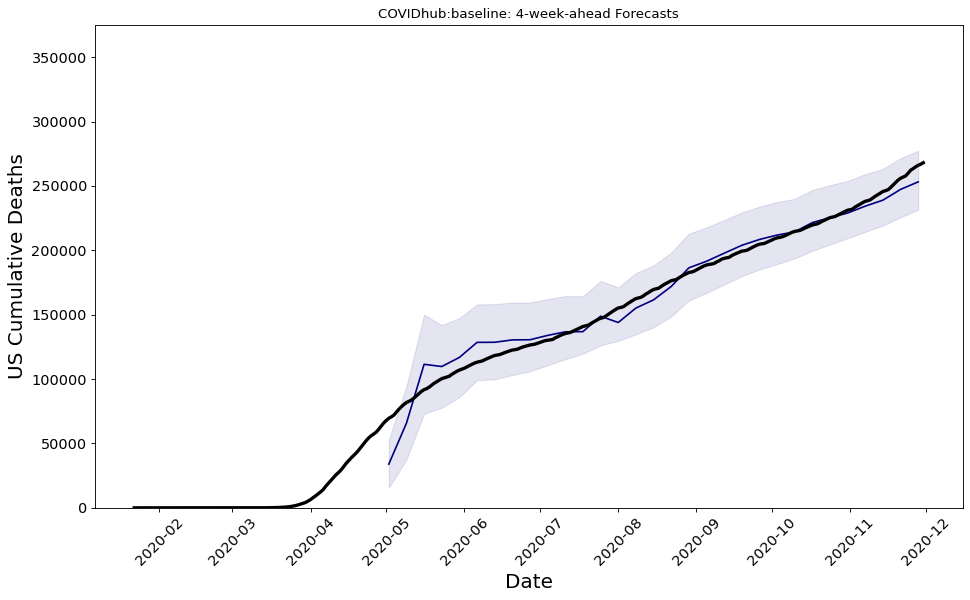

In [41]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline',figuresdirectory)

# Data Set Summary

In [42]:
#Number of Unique Case Forecasting Models in the data set 
len(ScoreboardCases['model'].unique())

31

In [43]:
#Number of Unique Cumulative Death Forecasting Models in the data set 
len(ScoreboardDeaths['model'].unique())

50

# Get weighted and unweighted model forecasts

In [44]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'weighted')

100%|██████████| 18/18 [00:00<00:00, 14608.64it/s]


In [45]:
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'weighted')

100%|██████████| 31/31 [00:00<00:00, 12560.22it/s]


In [46]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'unweighted')

100%|██████████| 19/19 [00:00<00:00, 13620.20it/s]


In [47]:
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'unweighted')

100%|██████████| 32/32 [00:00<00:00, 13949.05it/s]


# UNWEIGHTED FORECASTING

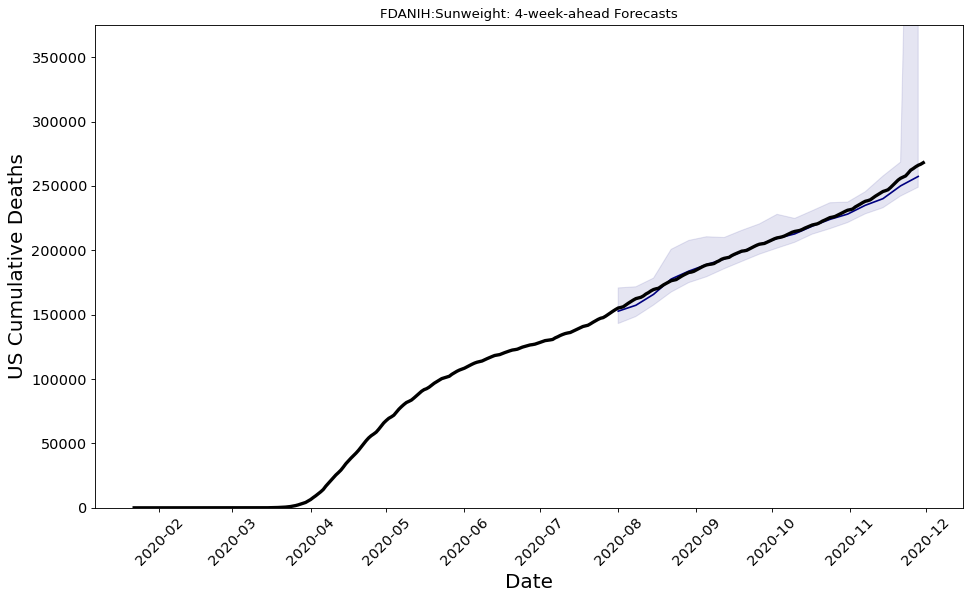

In [48]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sunweight',figuresdirectory)

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))


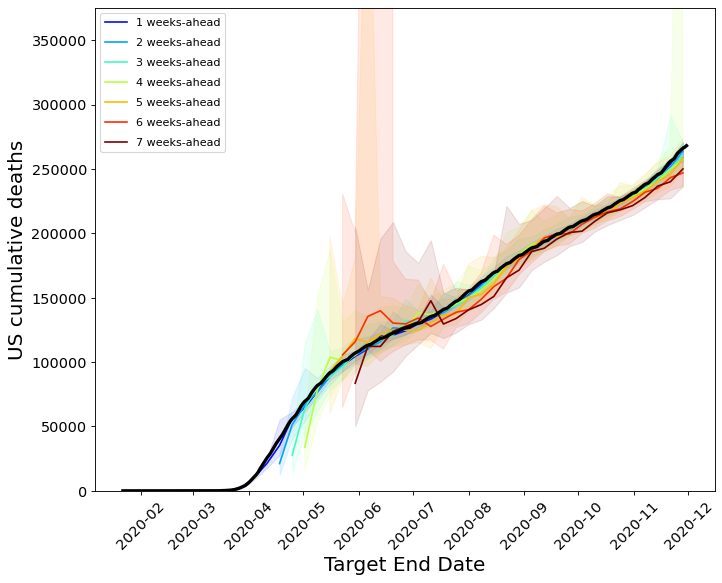

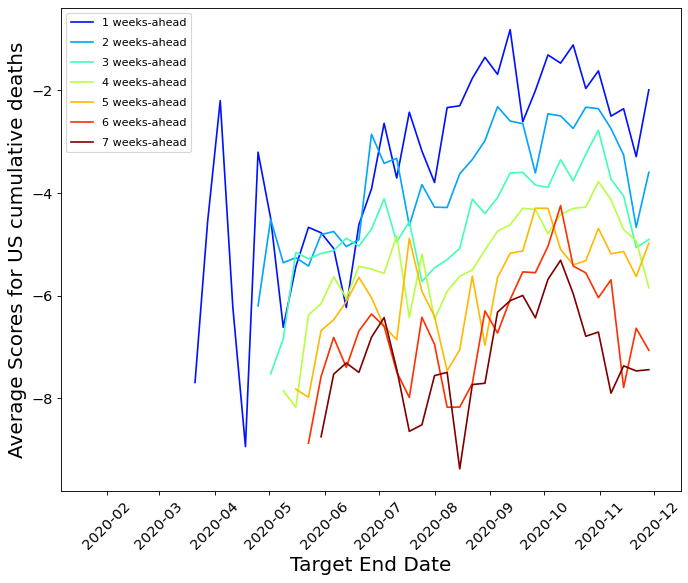

In [49]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7,figuresdirectory)

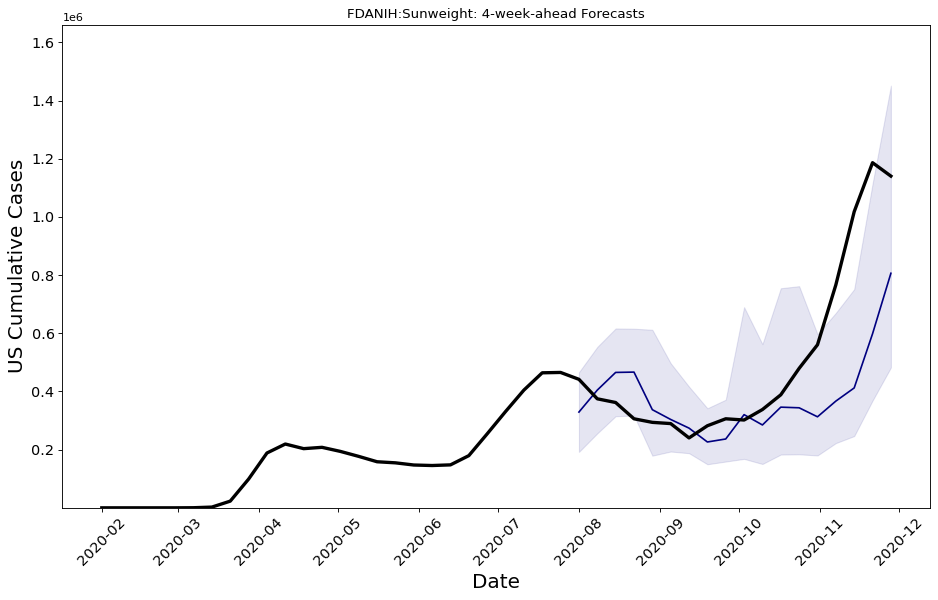

In [50]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sunweight',figuresdirectory)

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:282: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19

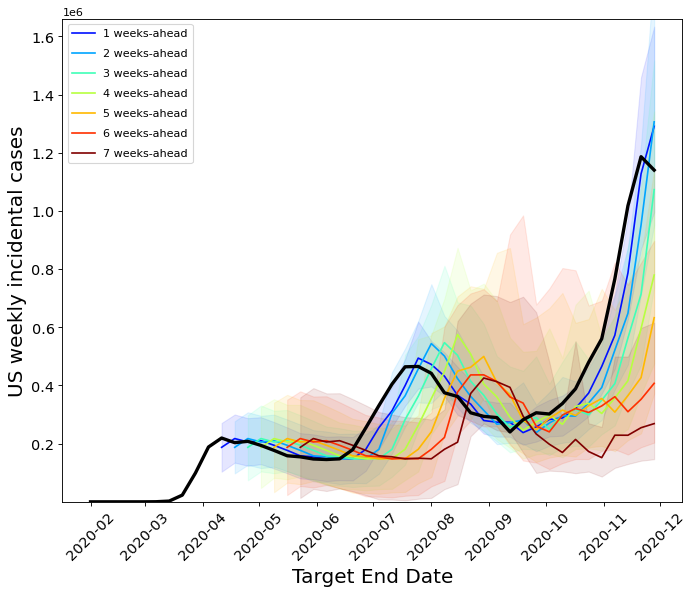

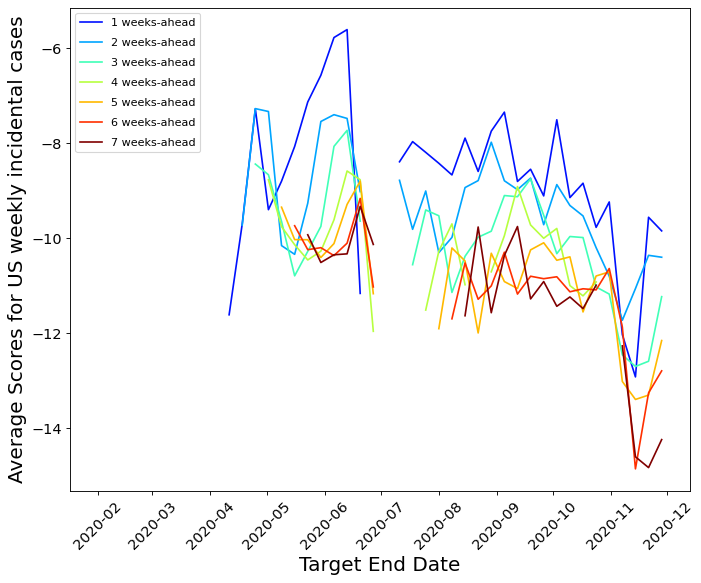

In [51]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7,figuresdirectory)

# SCORE-WEIGHTED FORECASTING

## Deaths

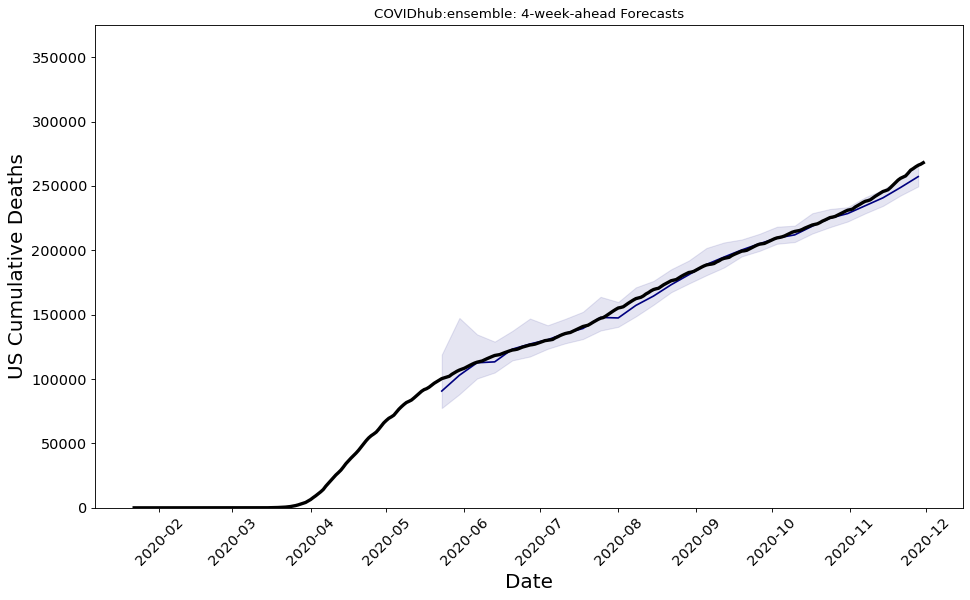

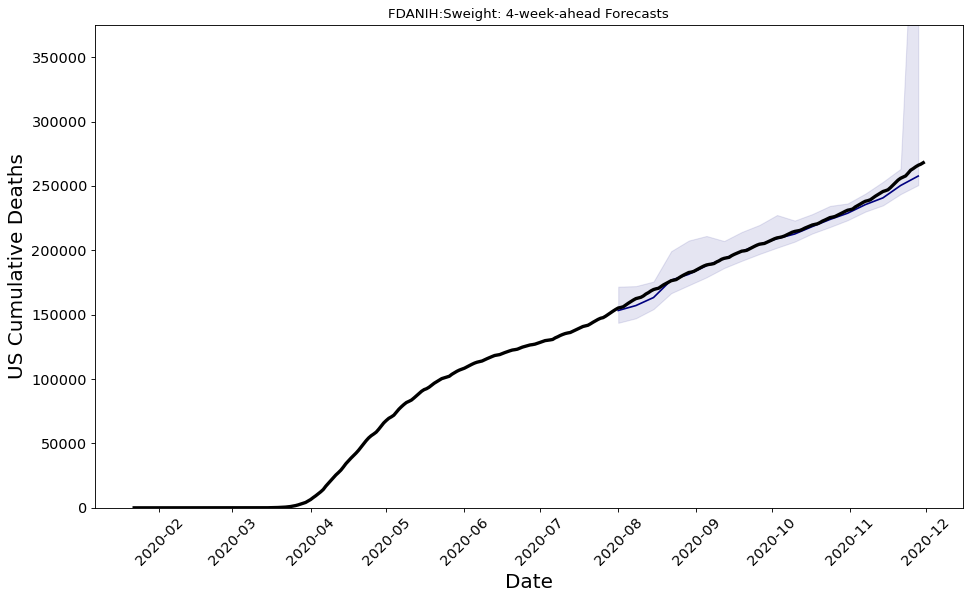

In [52]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:ensemble',figuresdirectory)
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sweight',figuresdirectory)

## Cases

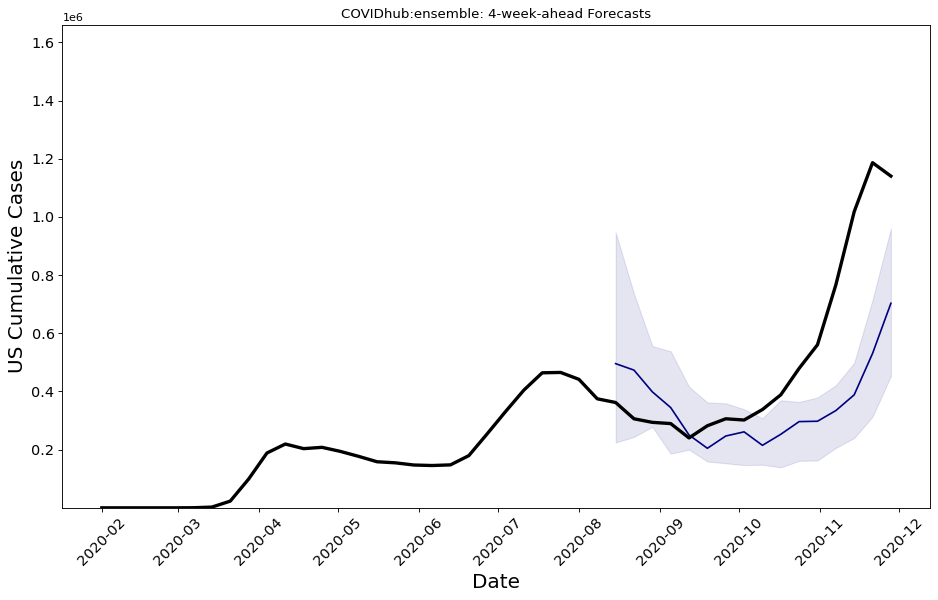

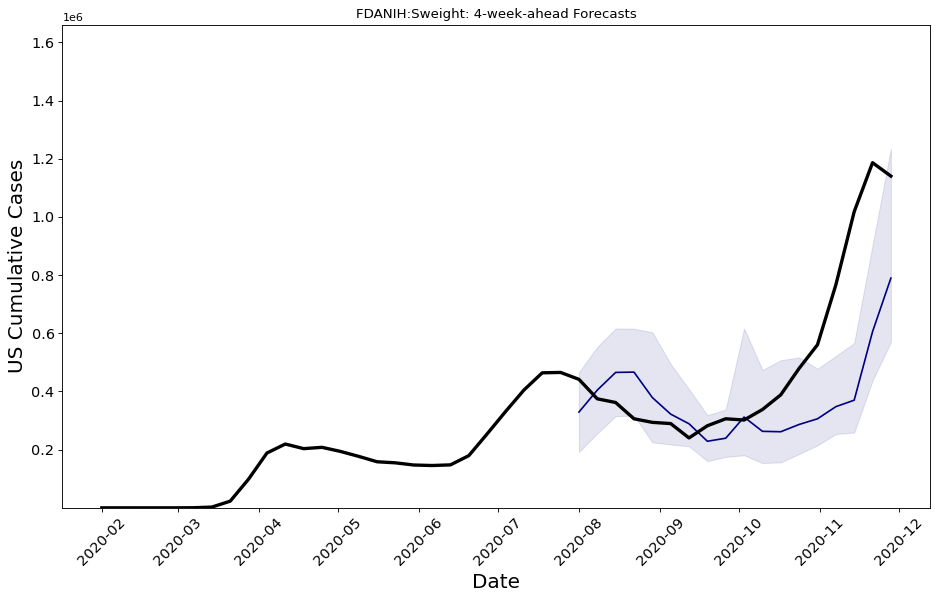

In [53]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'COVIDhub:ensemble',figuresdirectory)
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sweight',figuresdirectory)

# ANALYSIS OF SCORES

## Plots by date forecast made

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:399: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


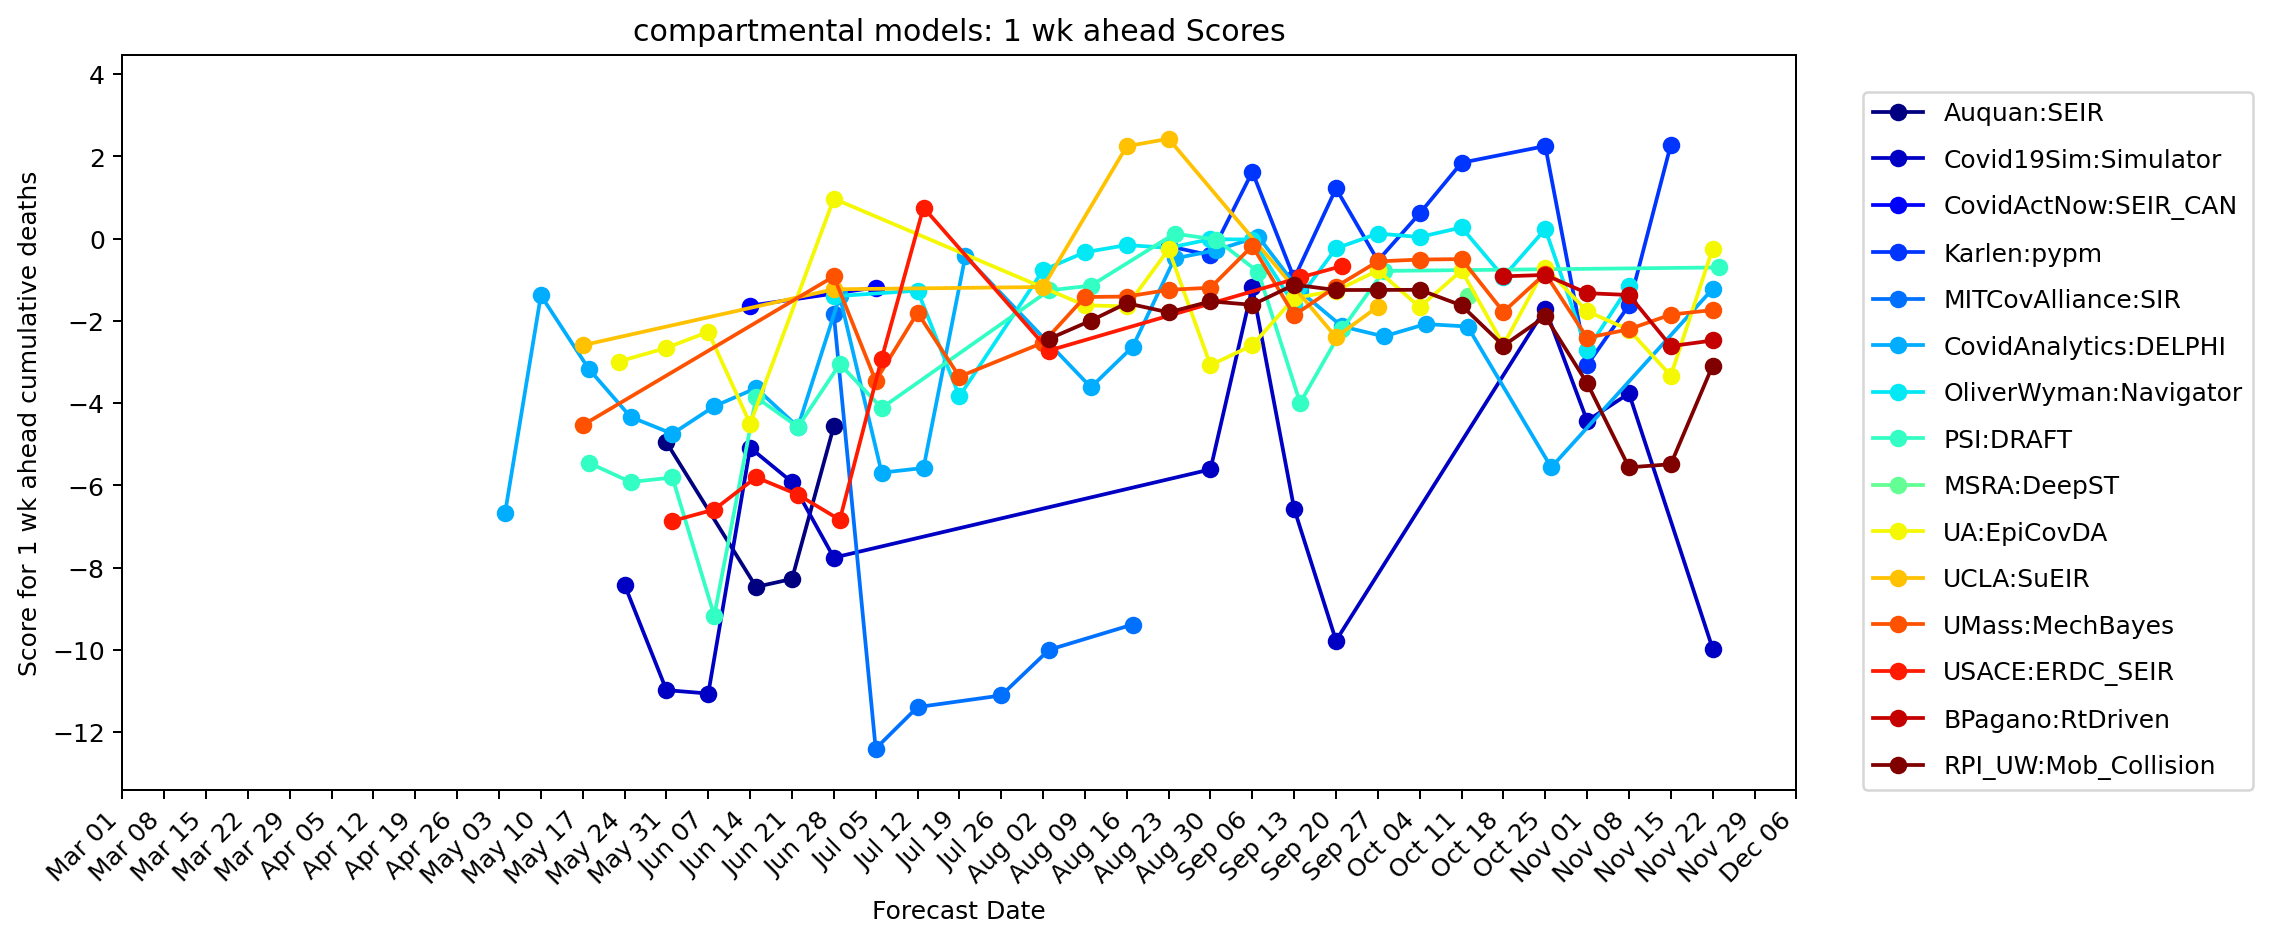

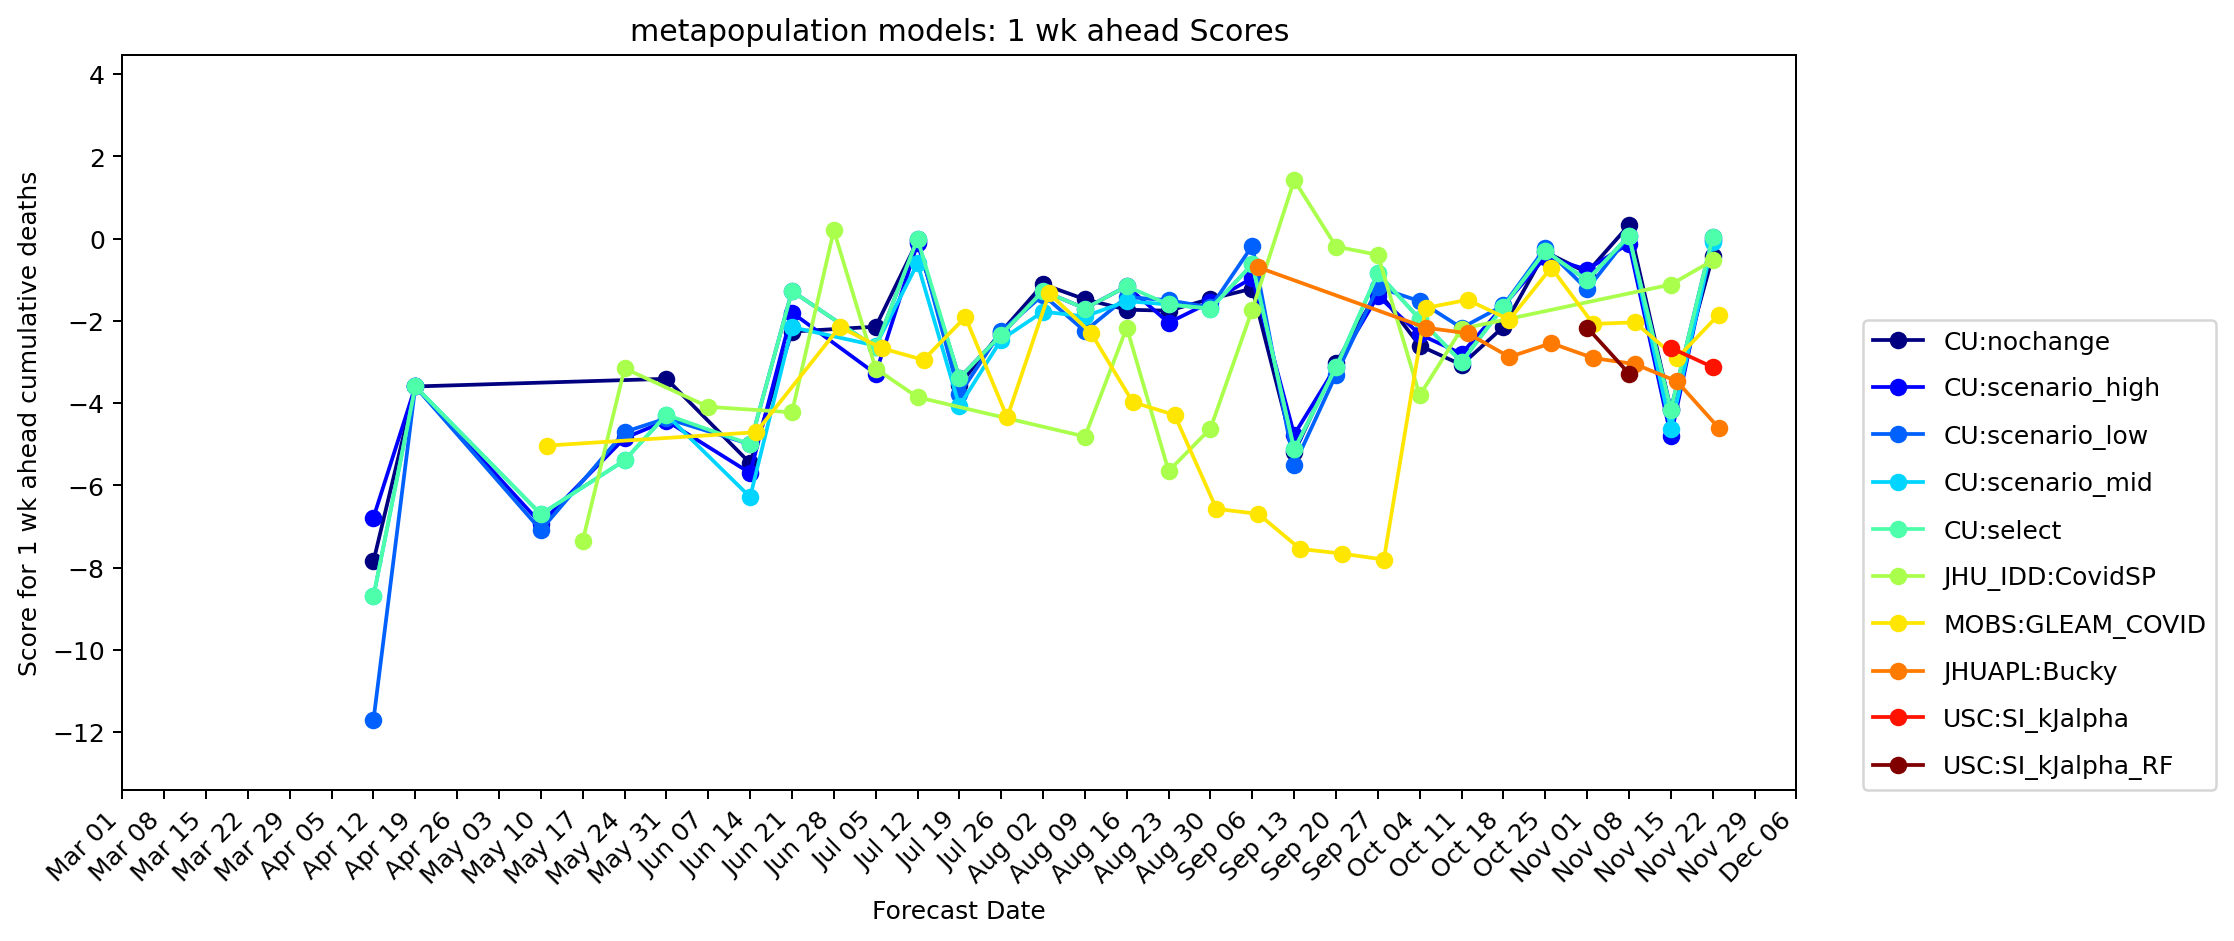

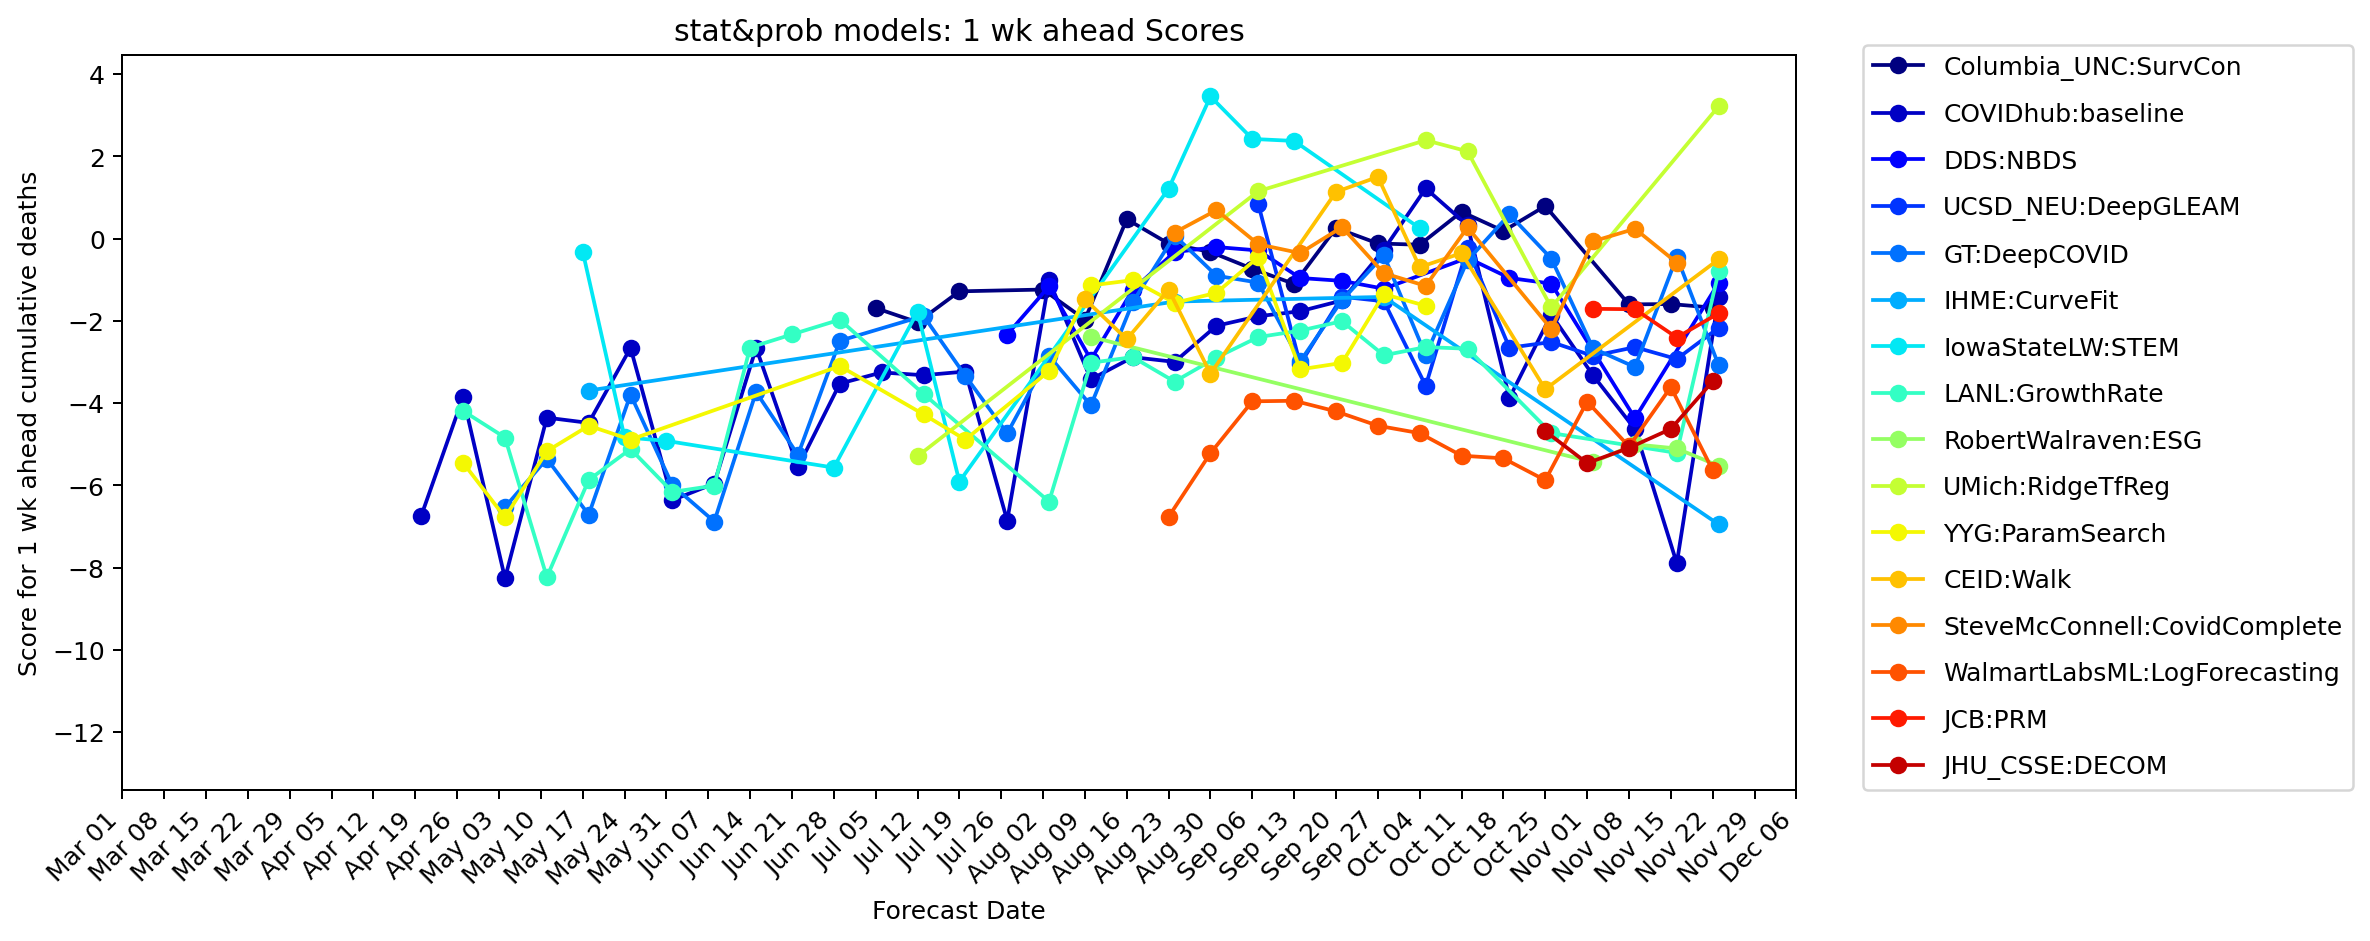

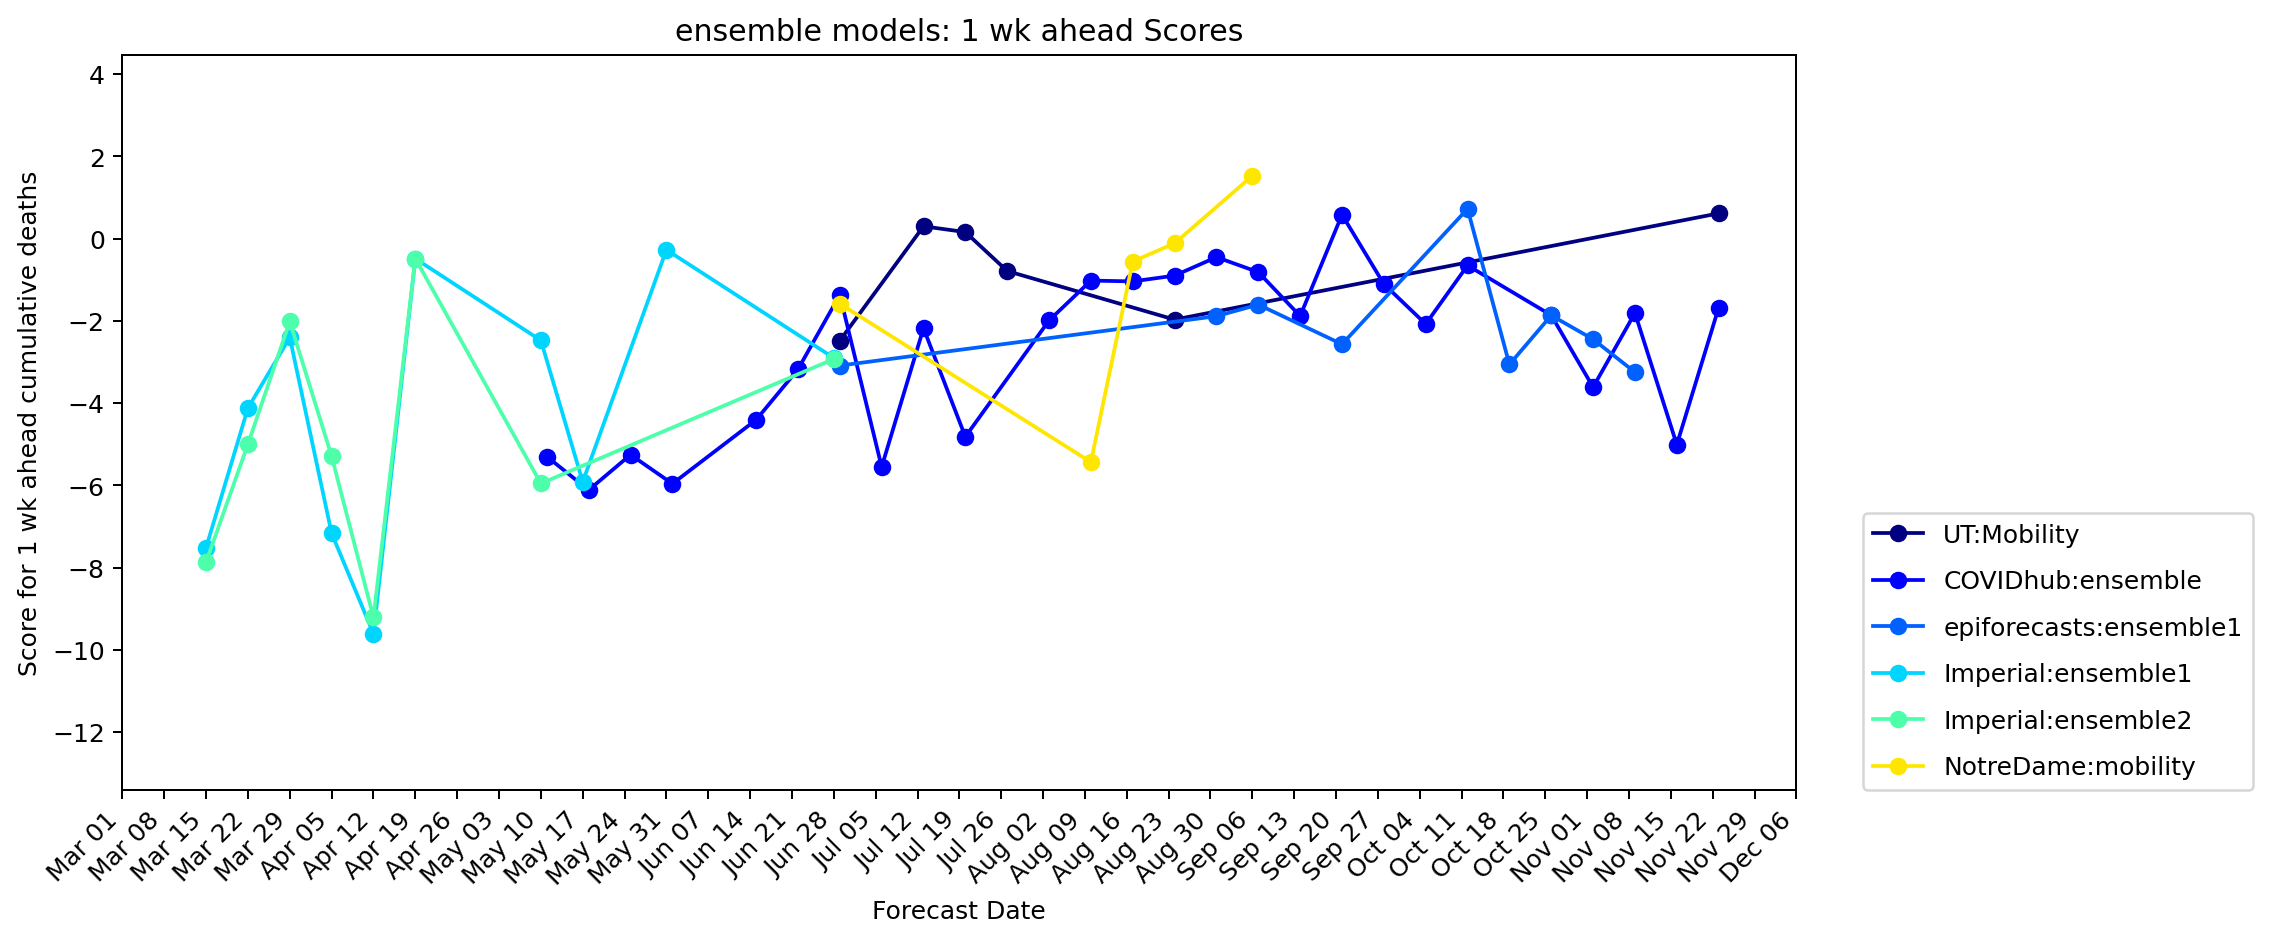

In [54]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:399: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


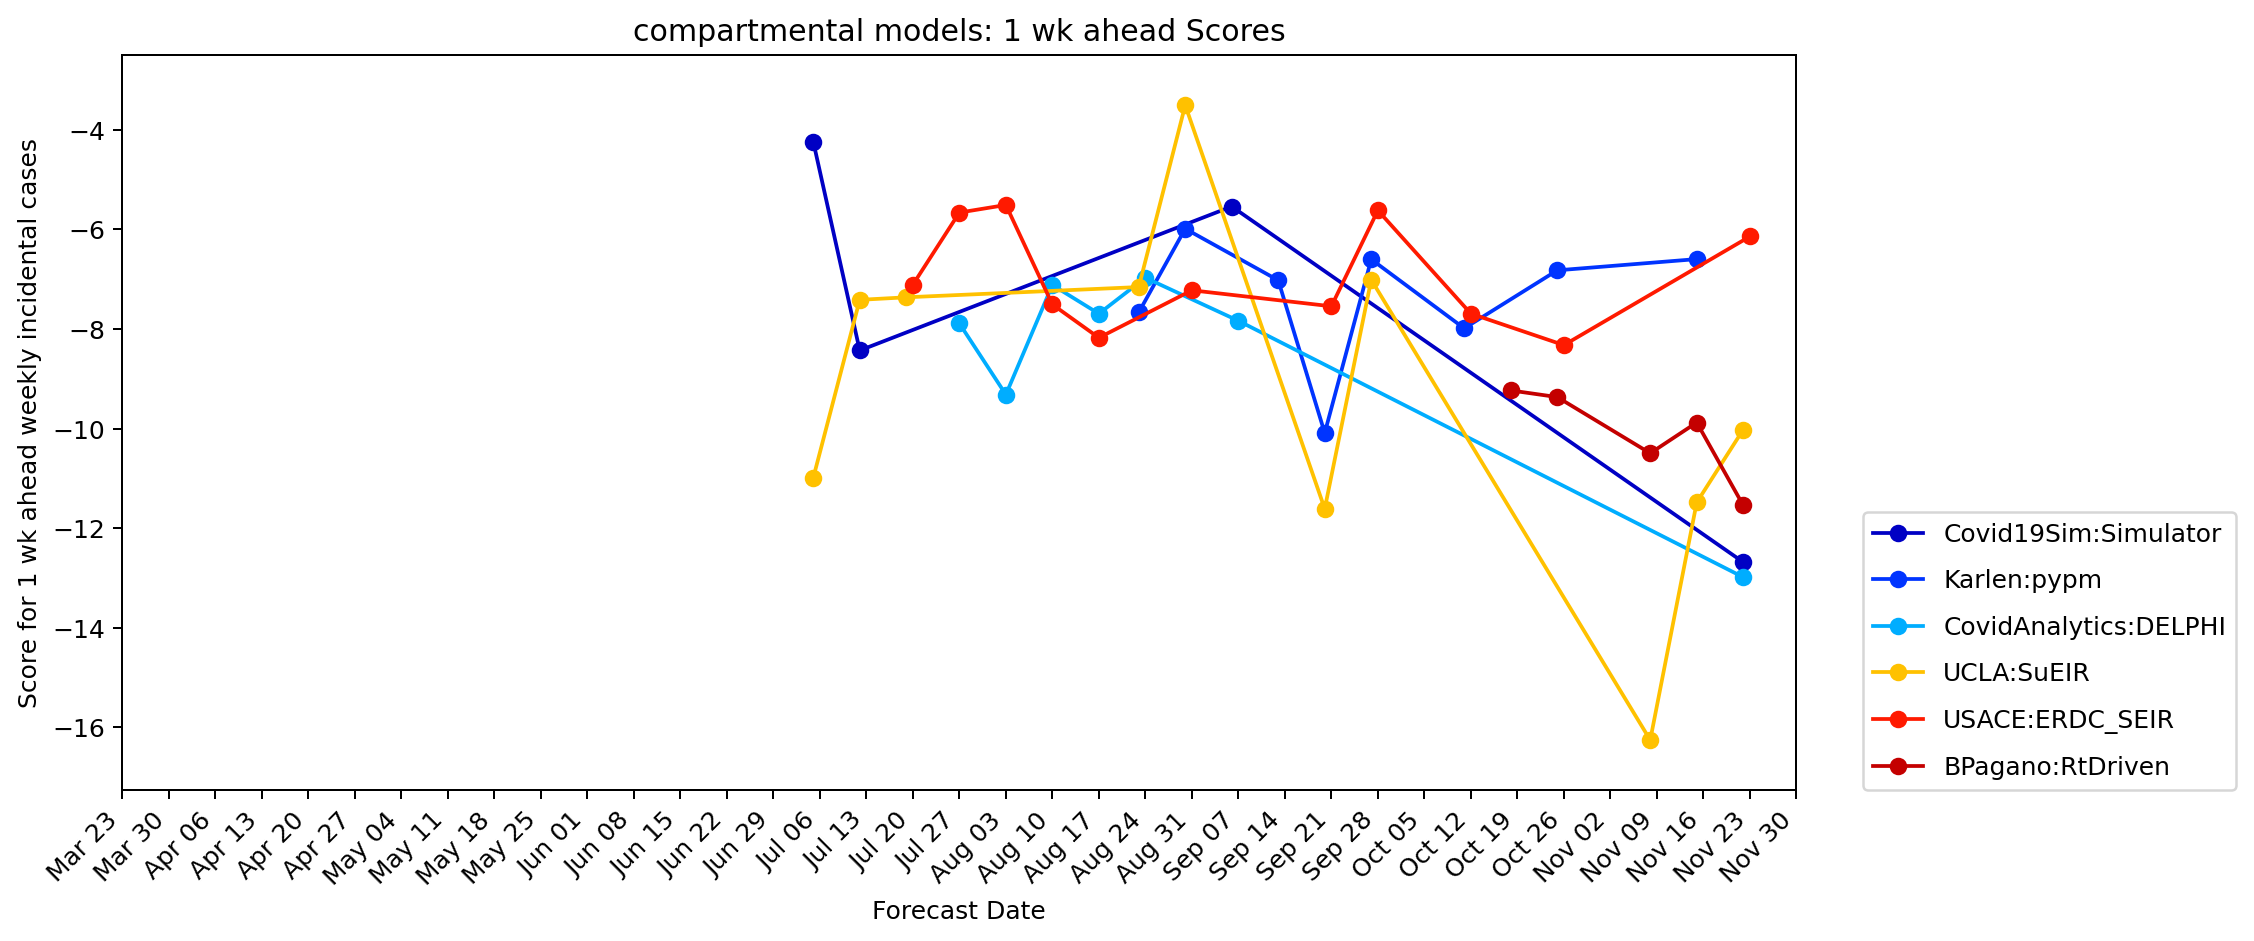

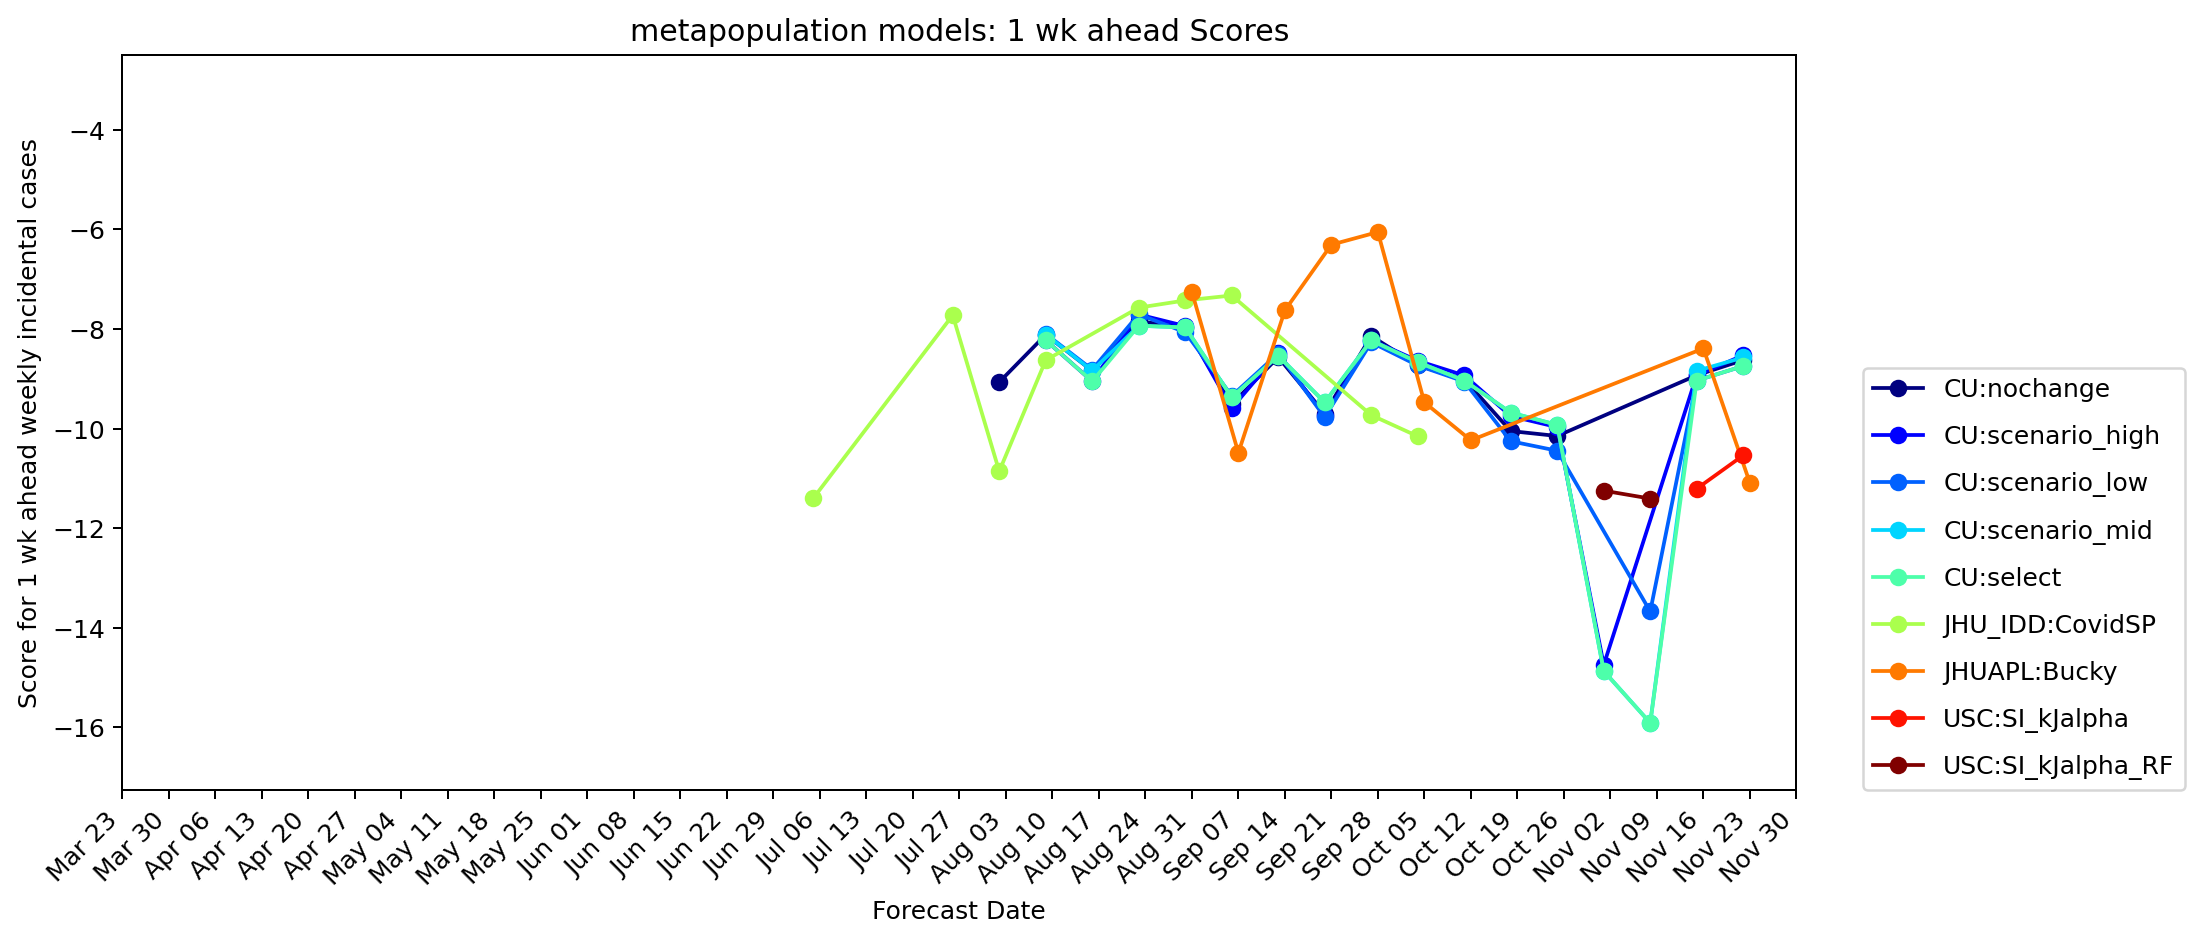

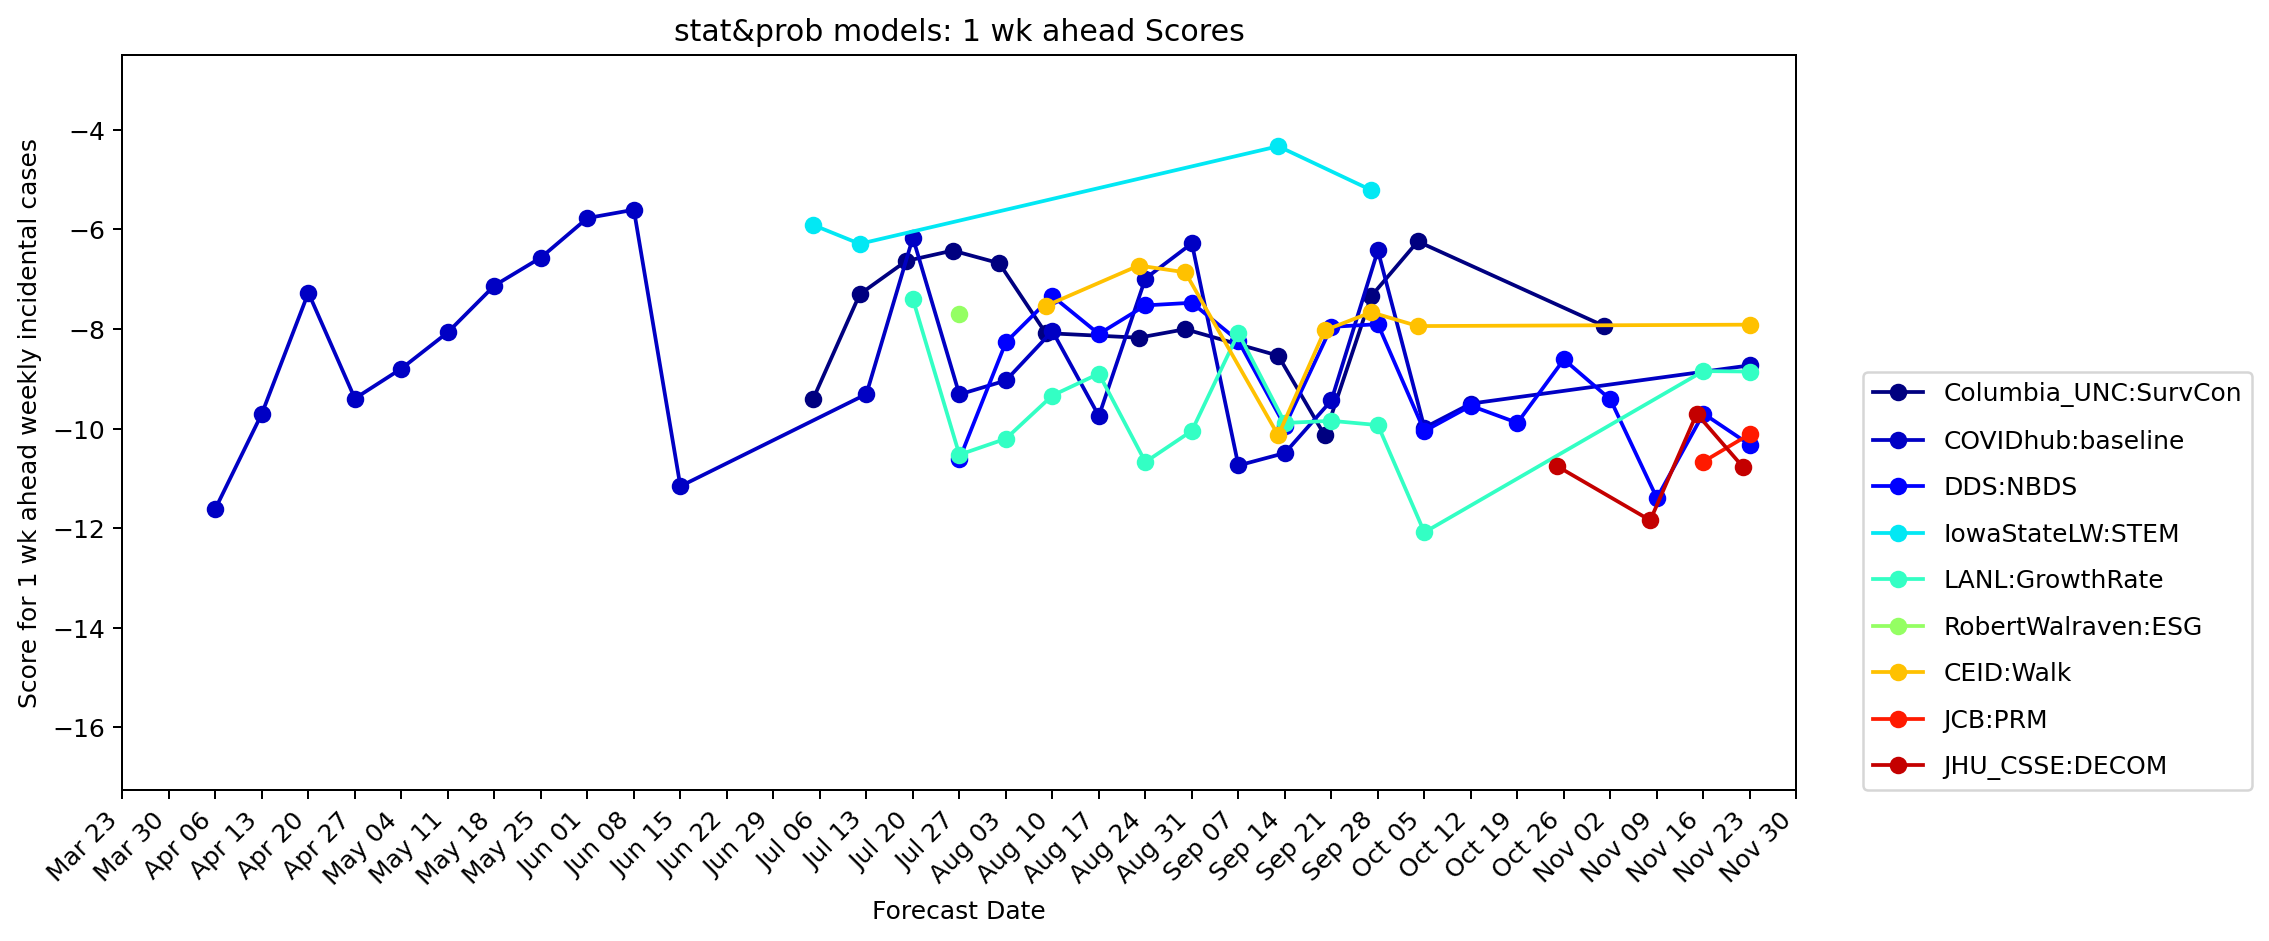

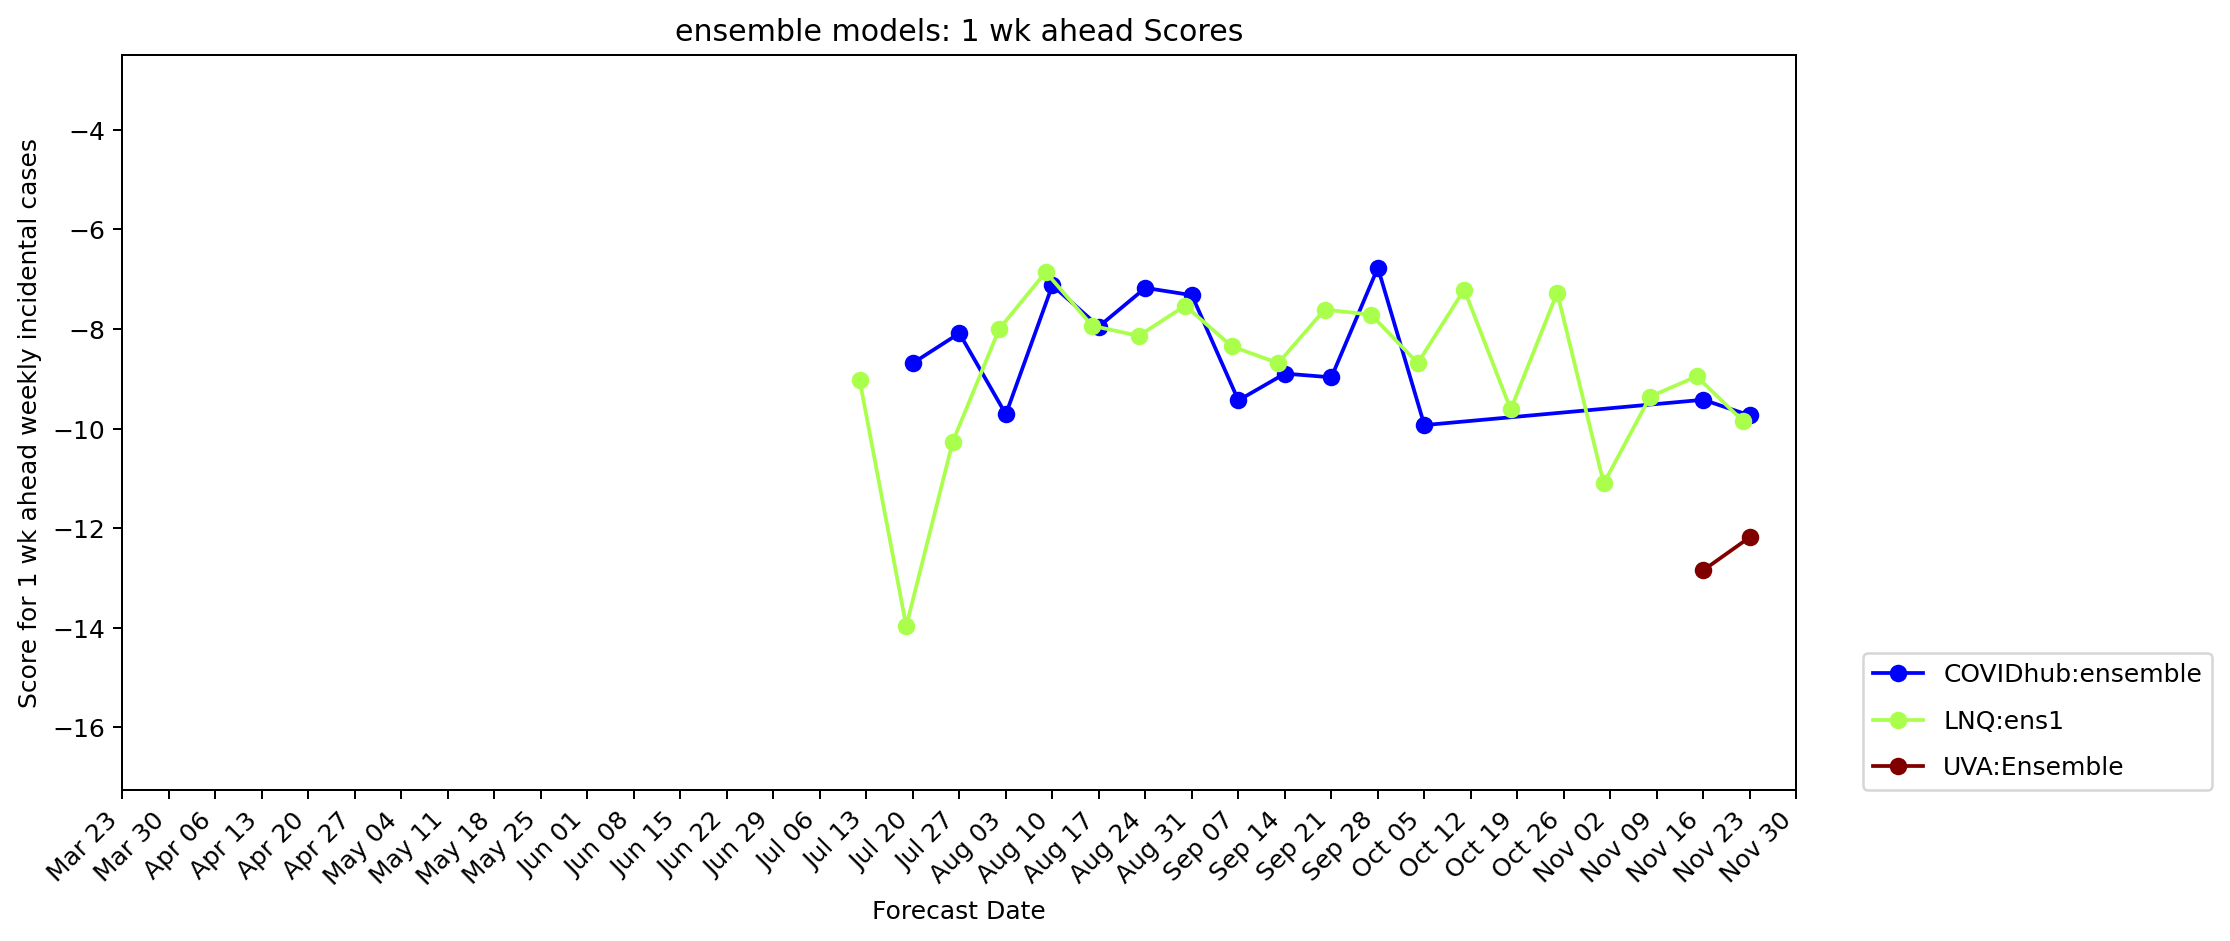

In [55]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:427: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


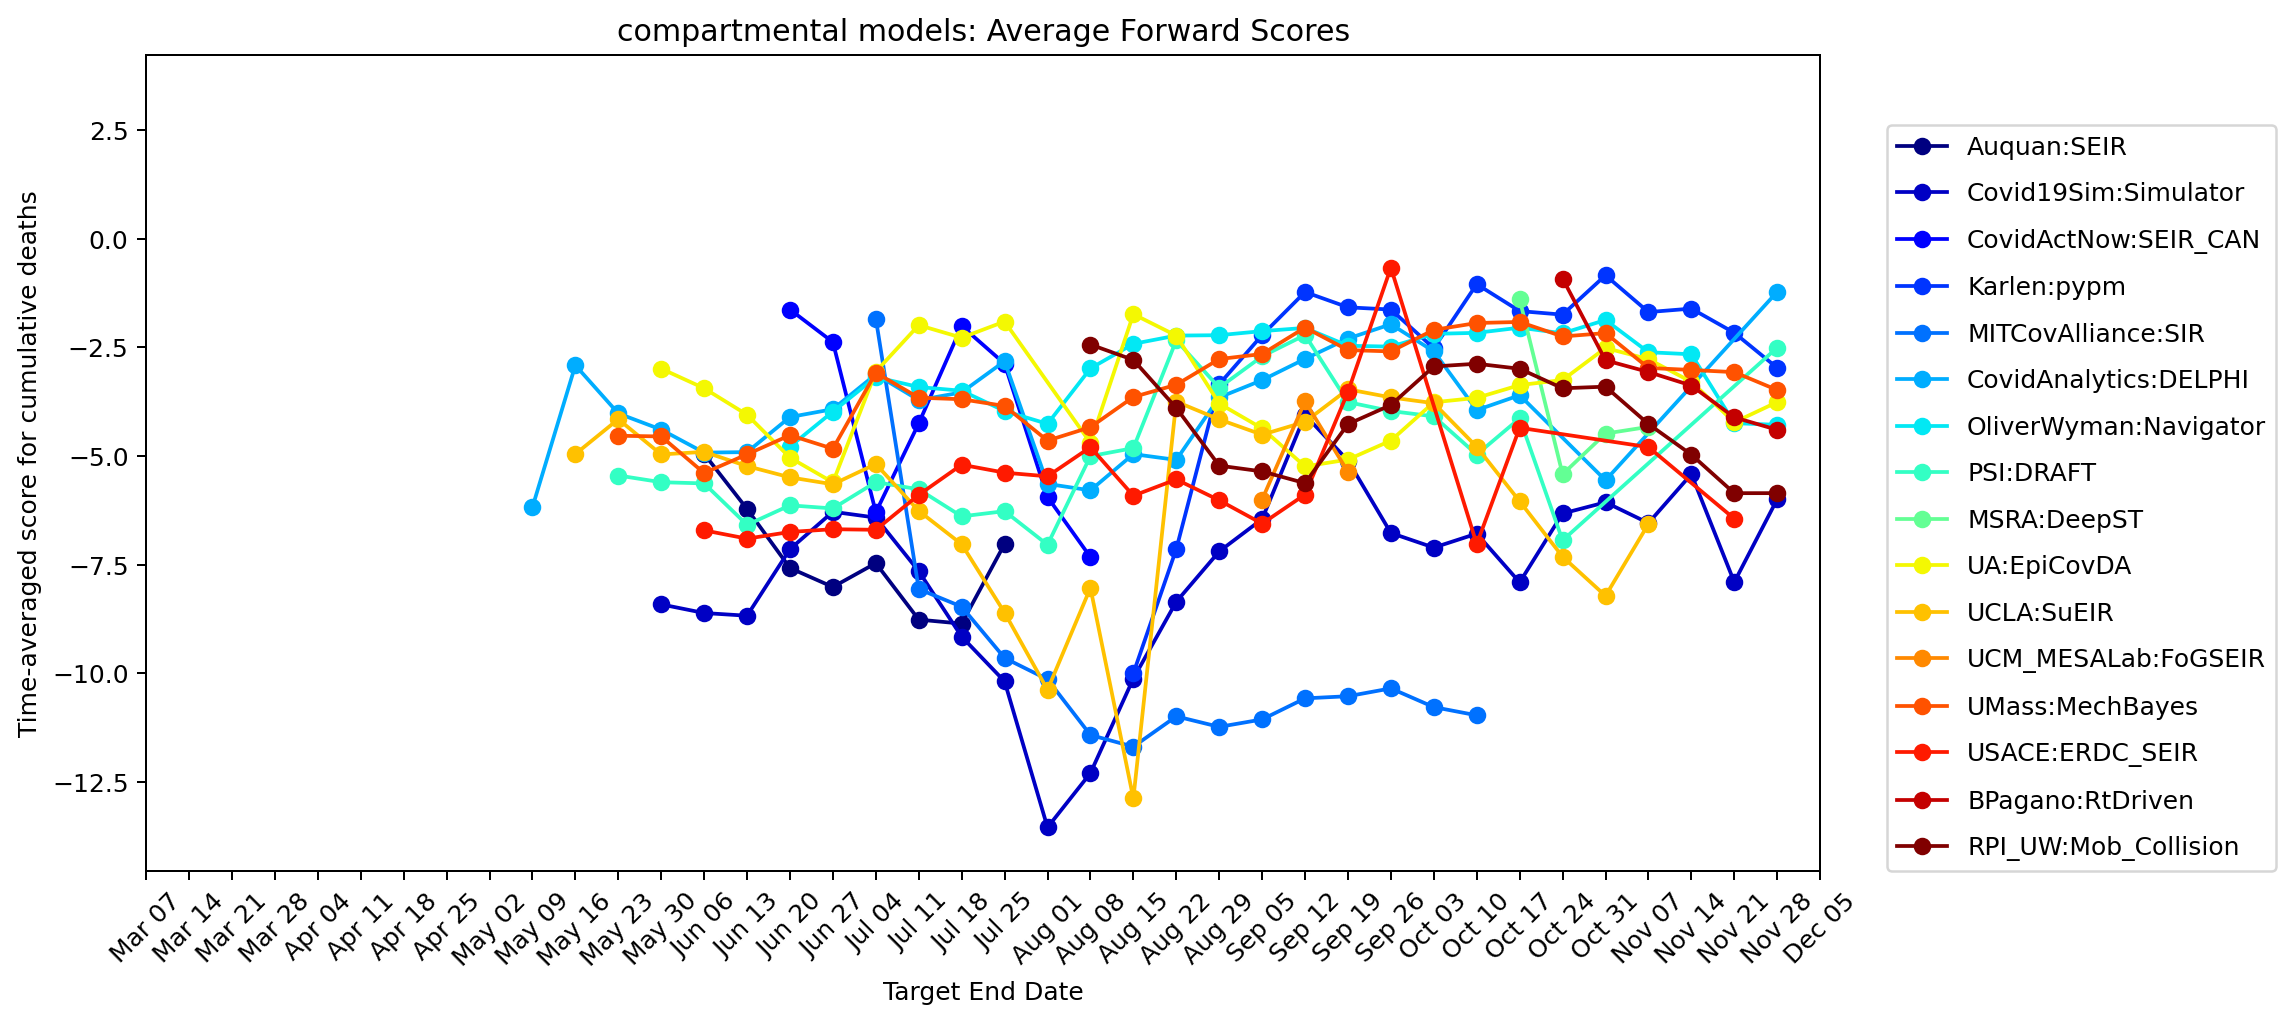

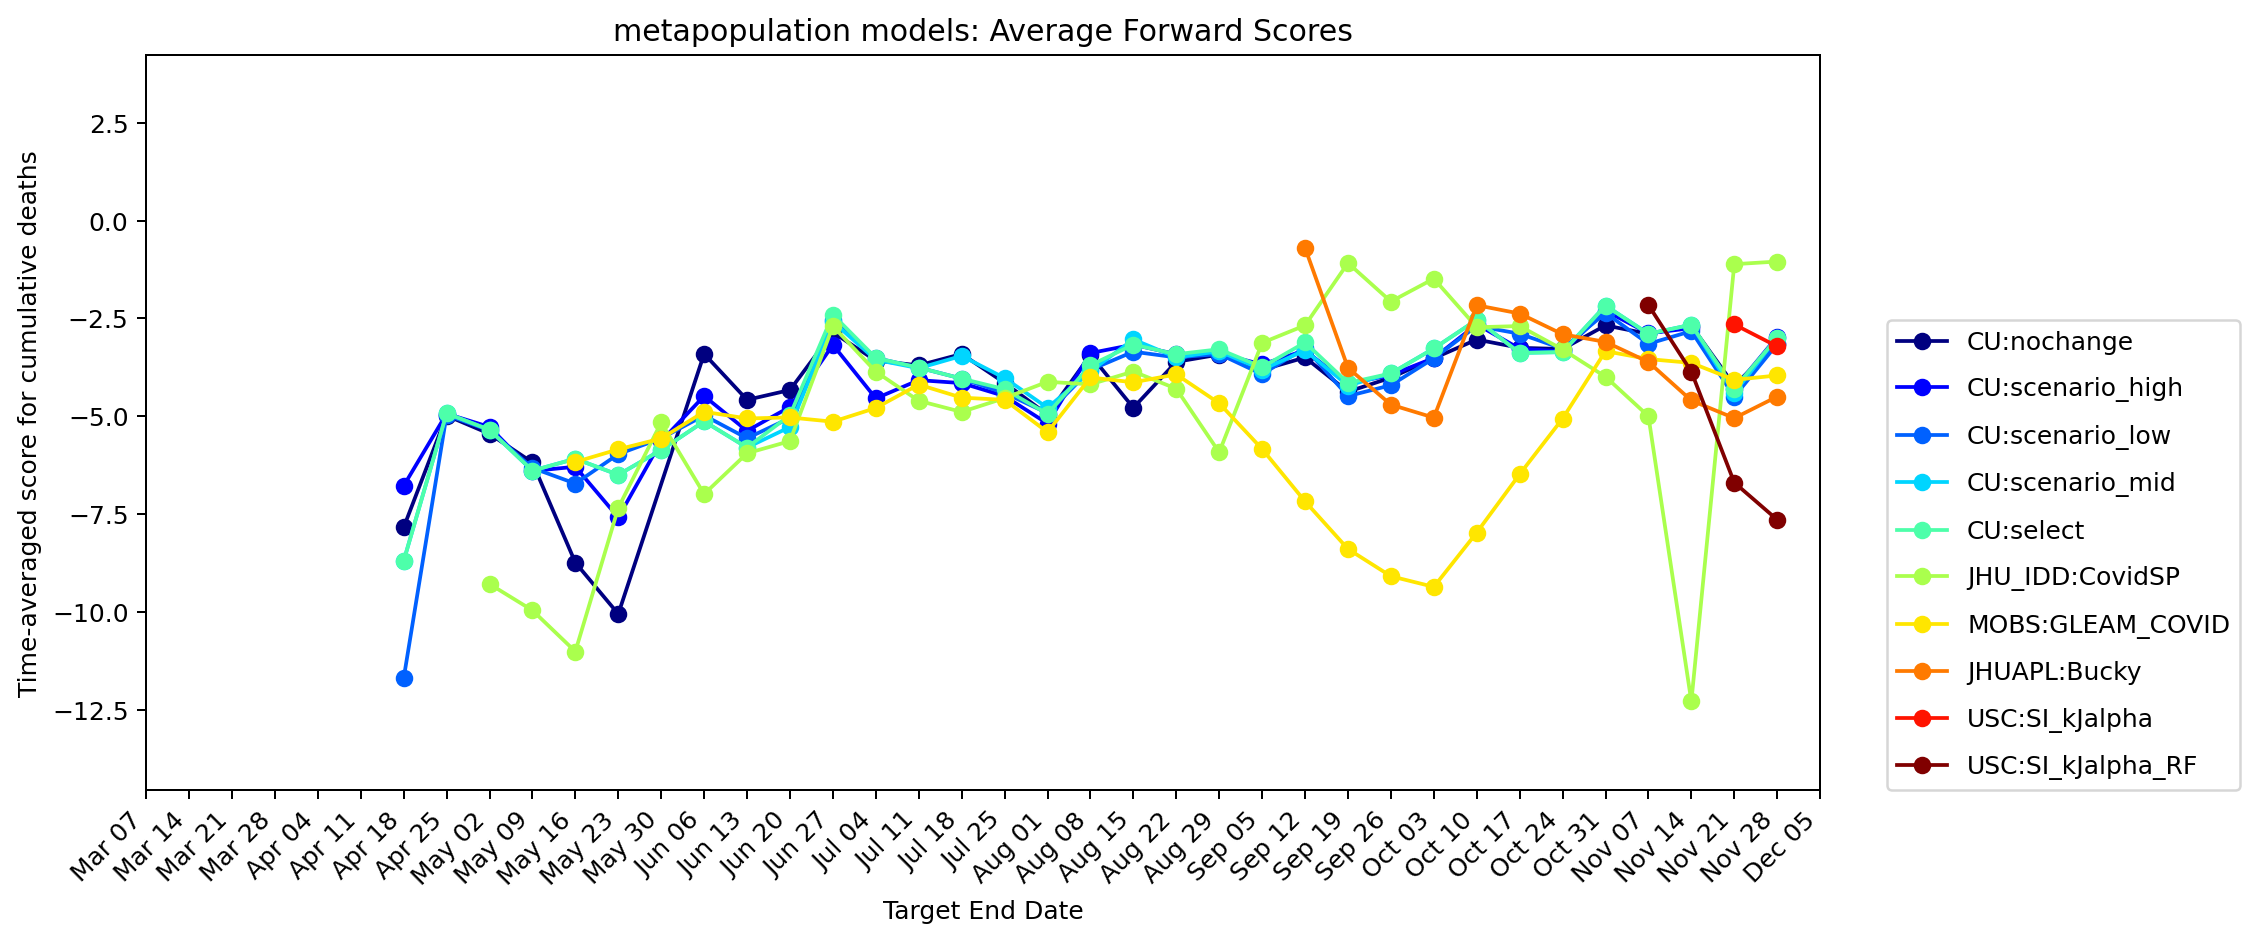

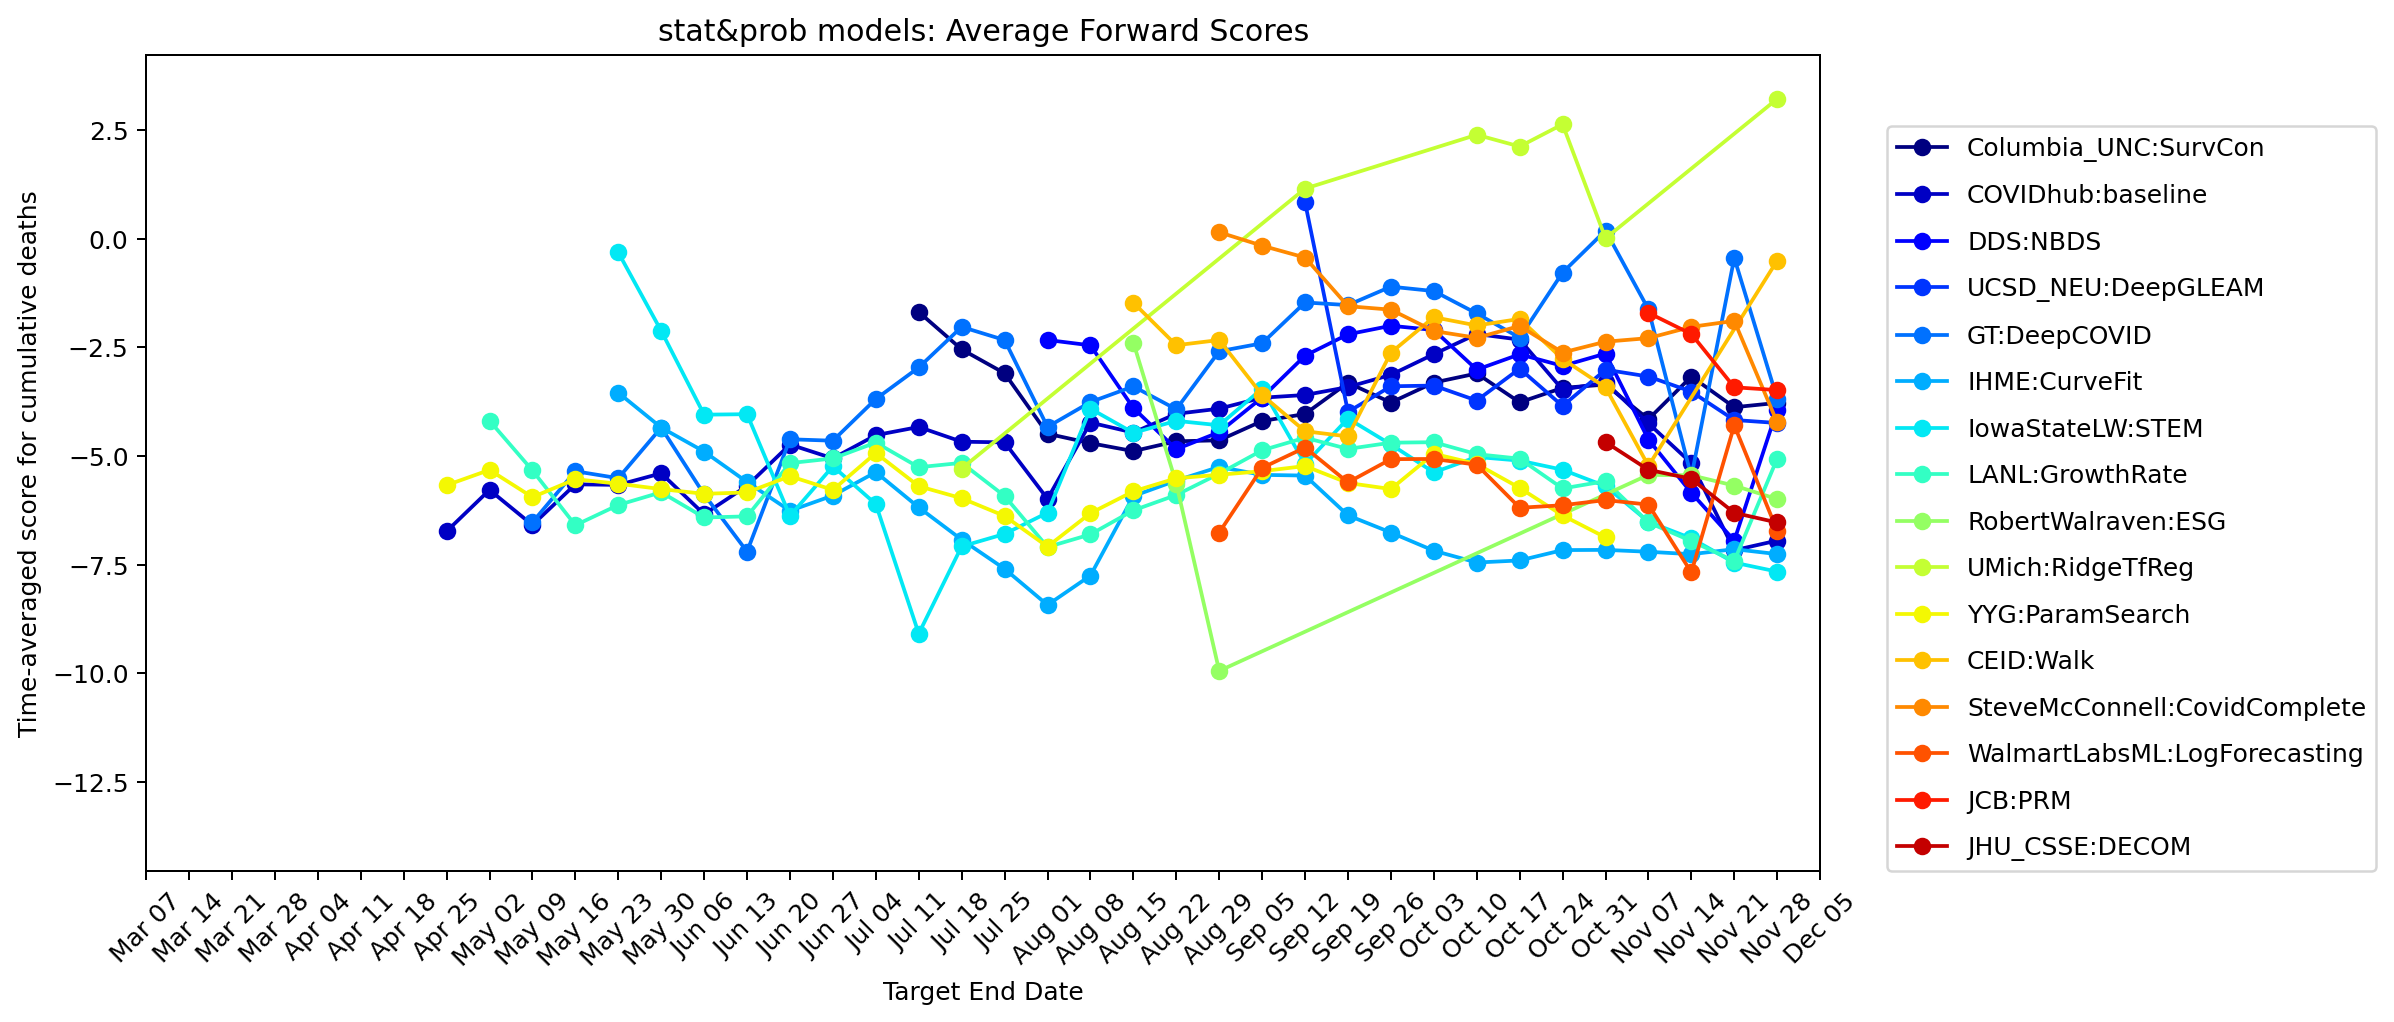

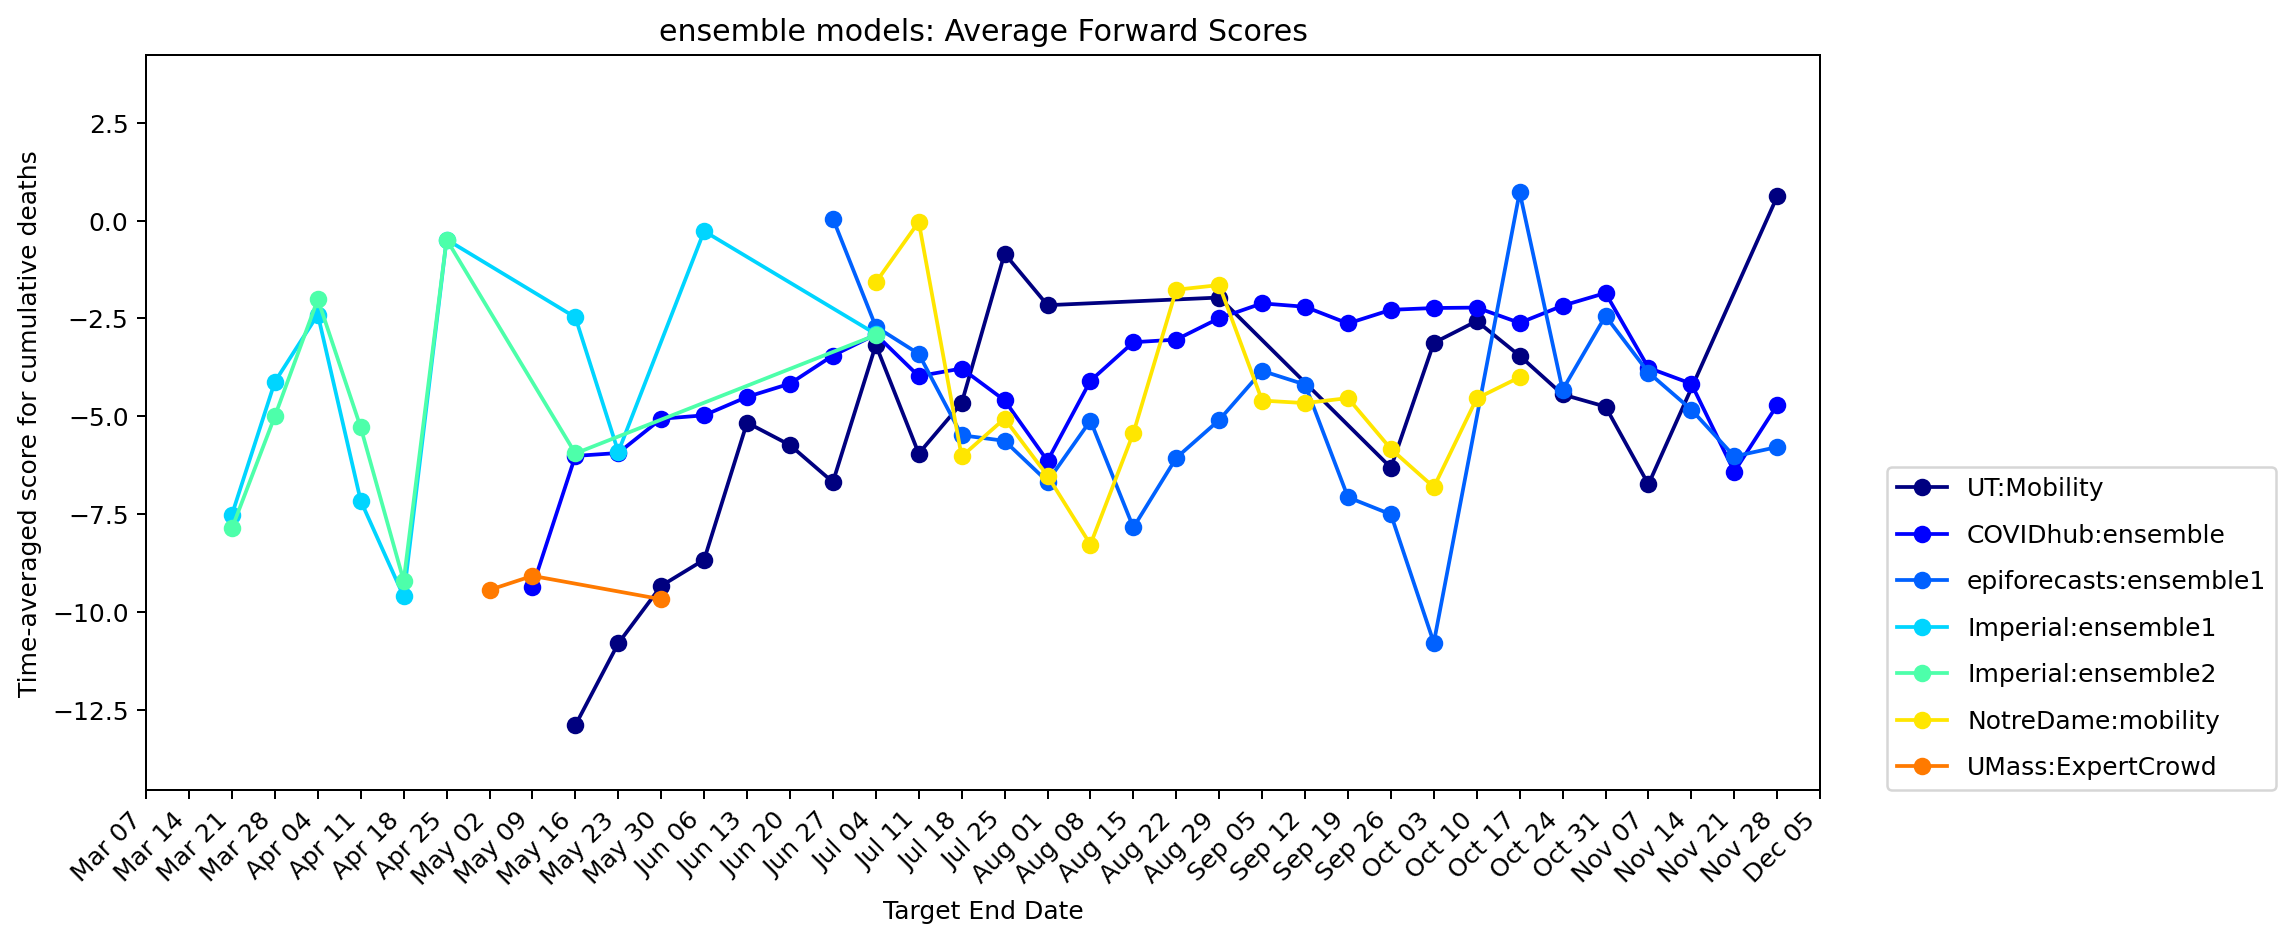

In [56]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:427: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


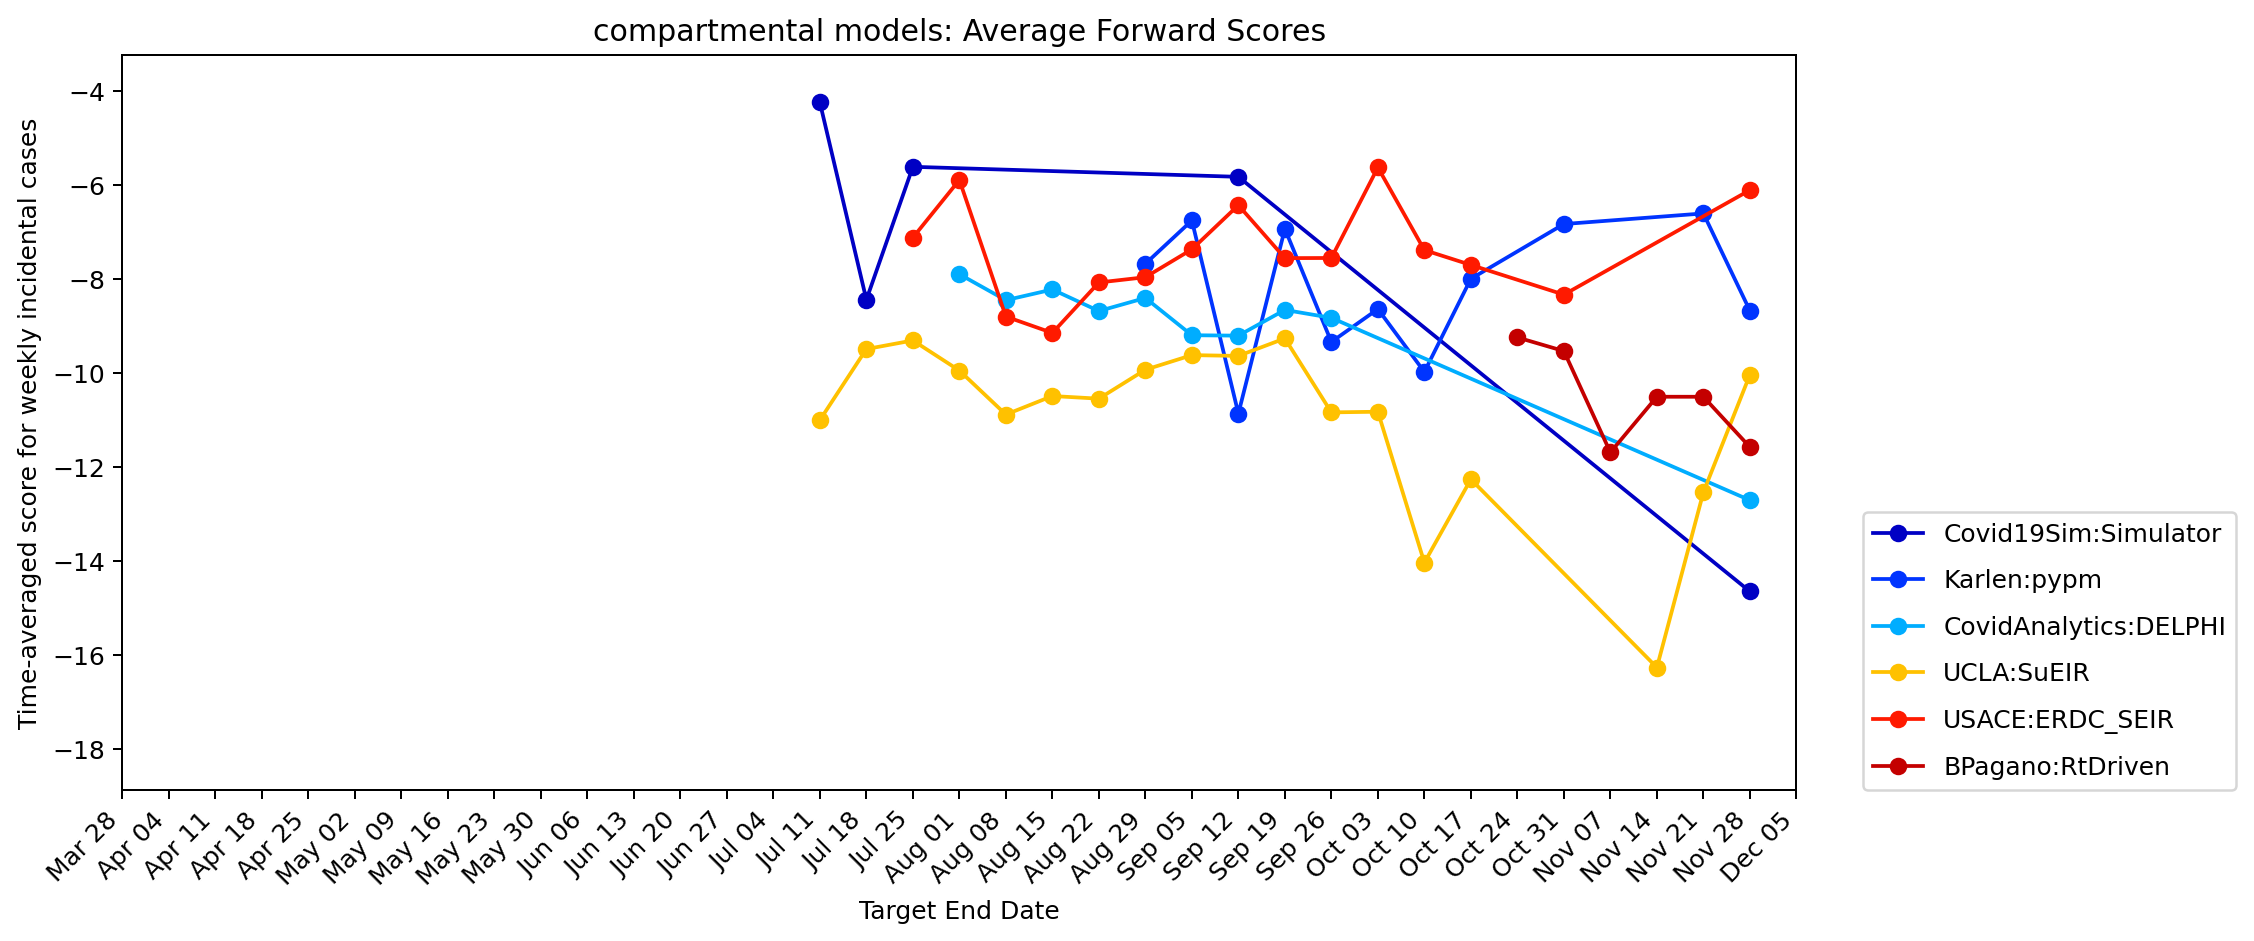

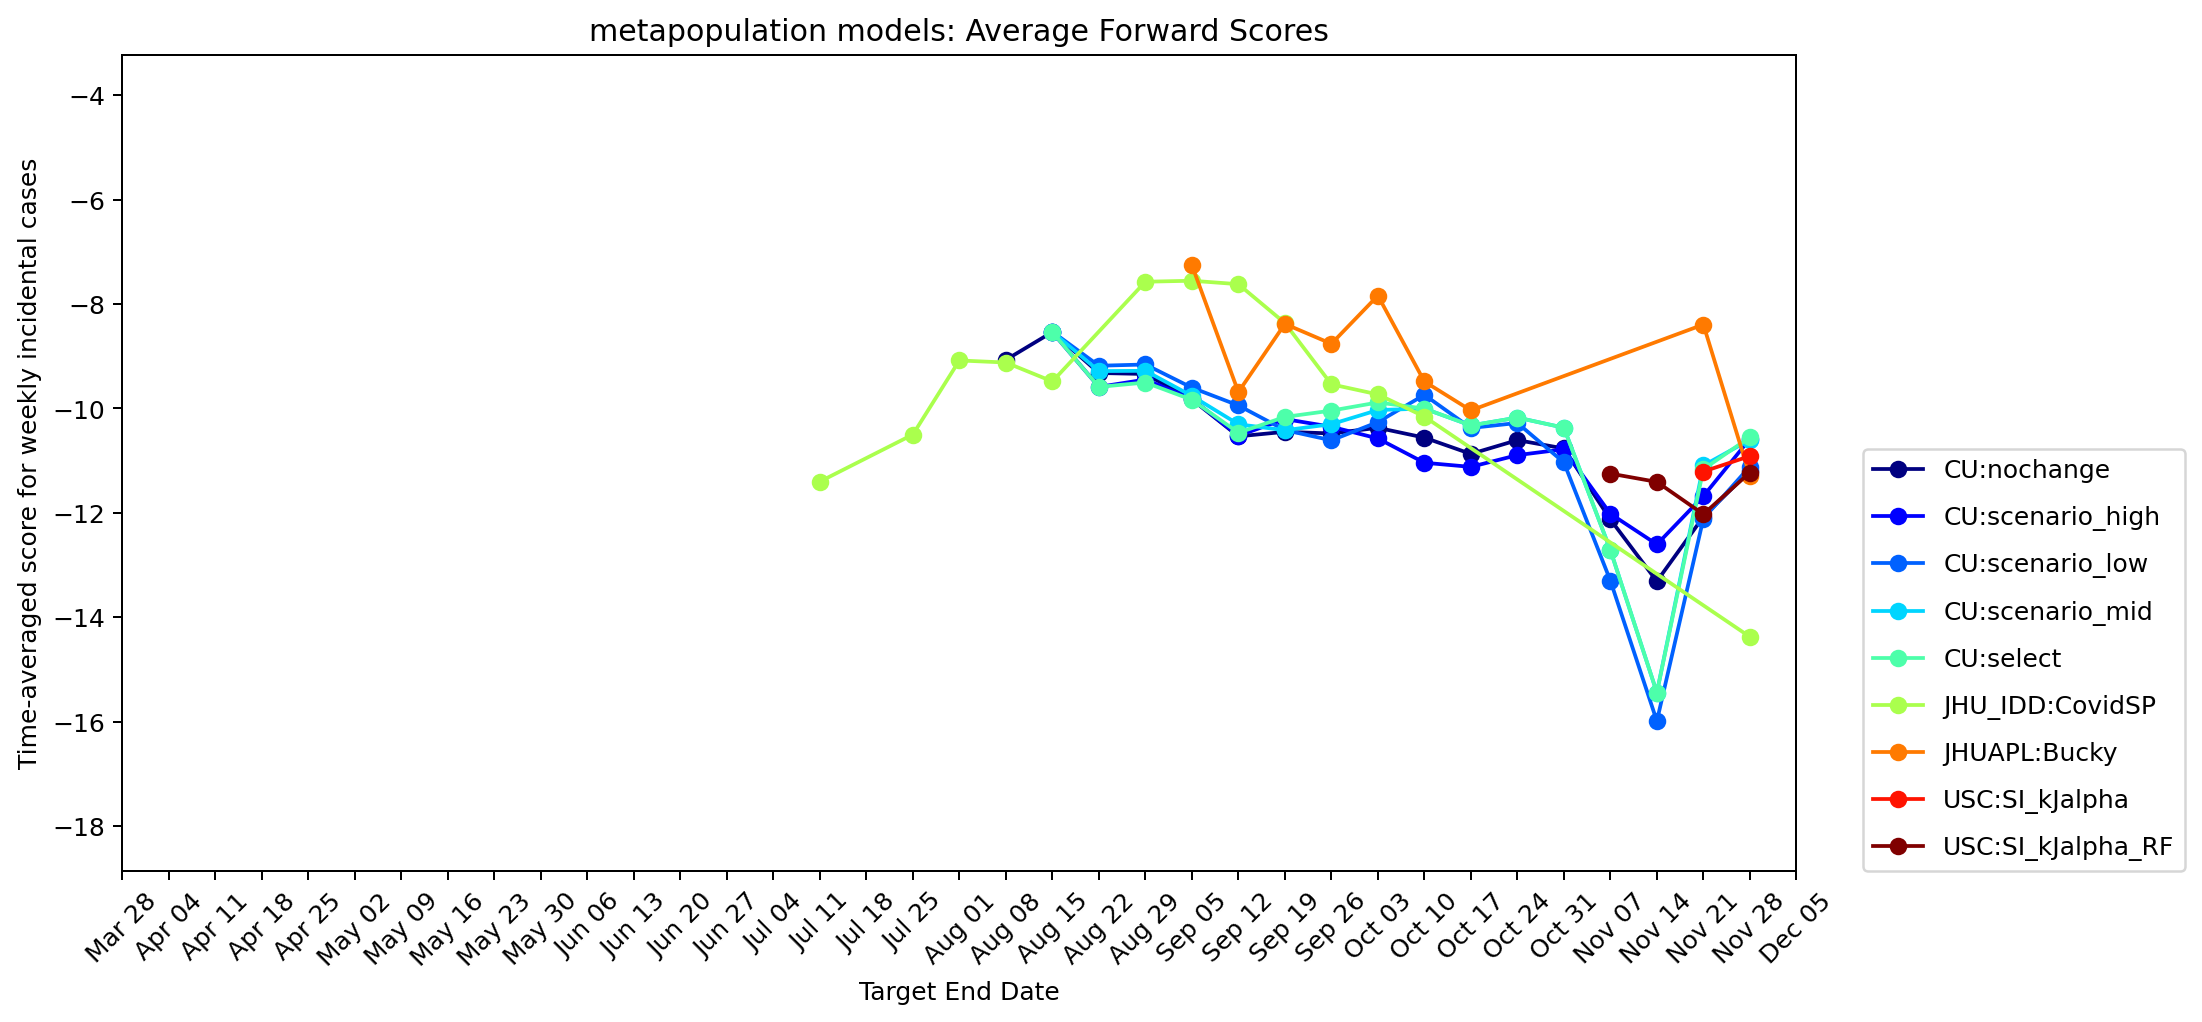

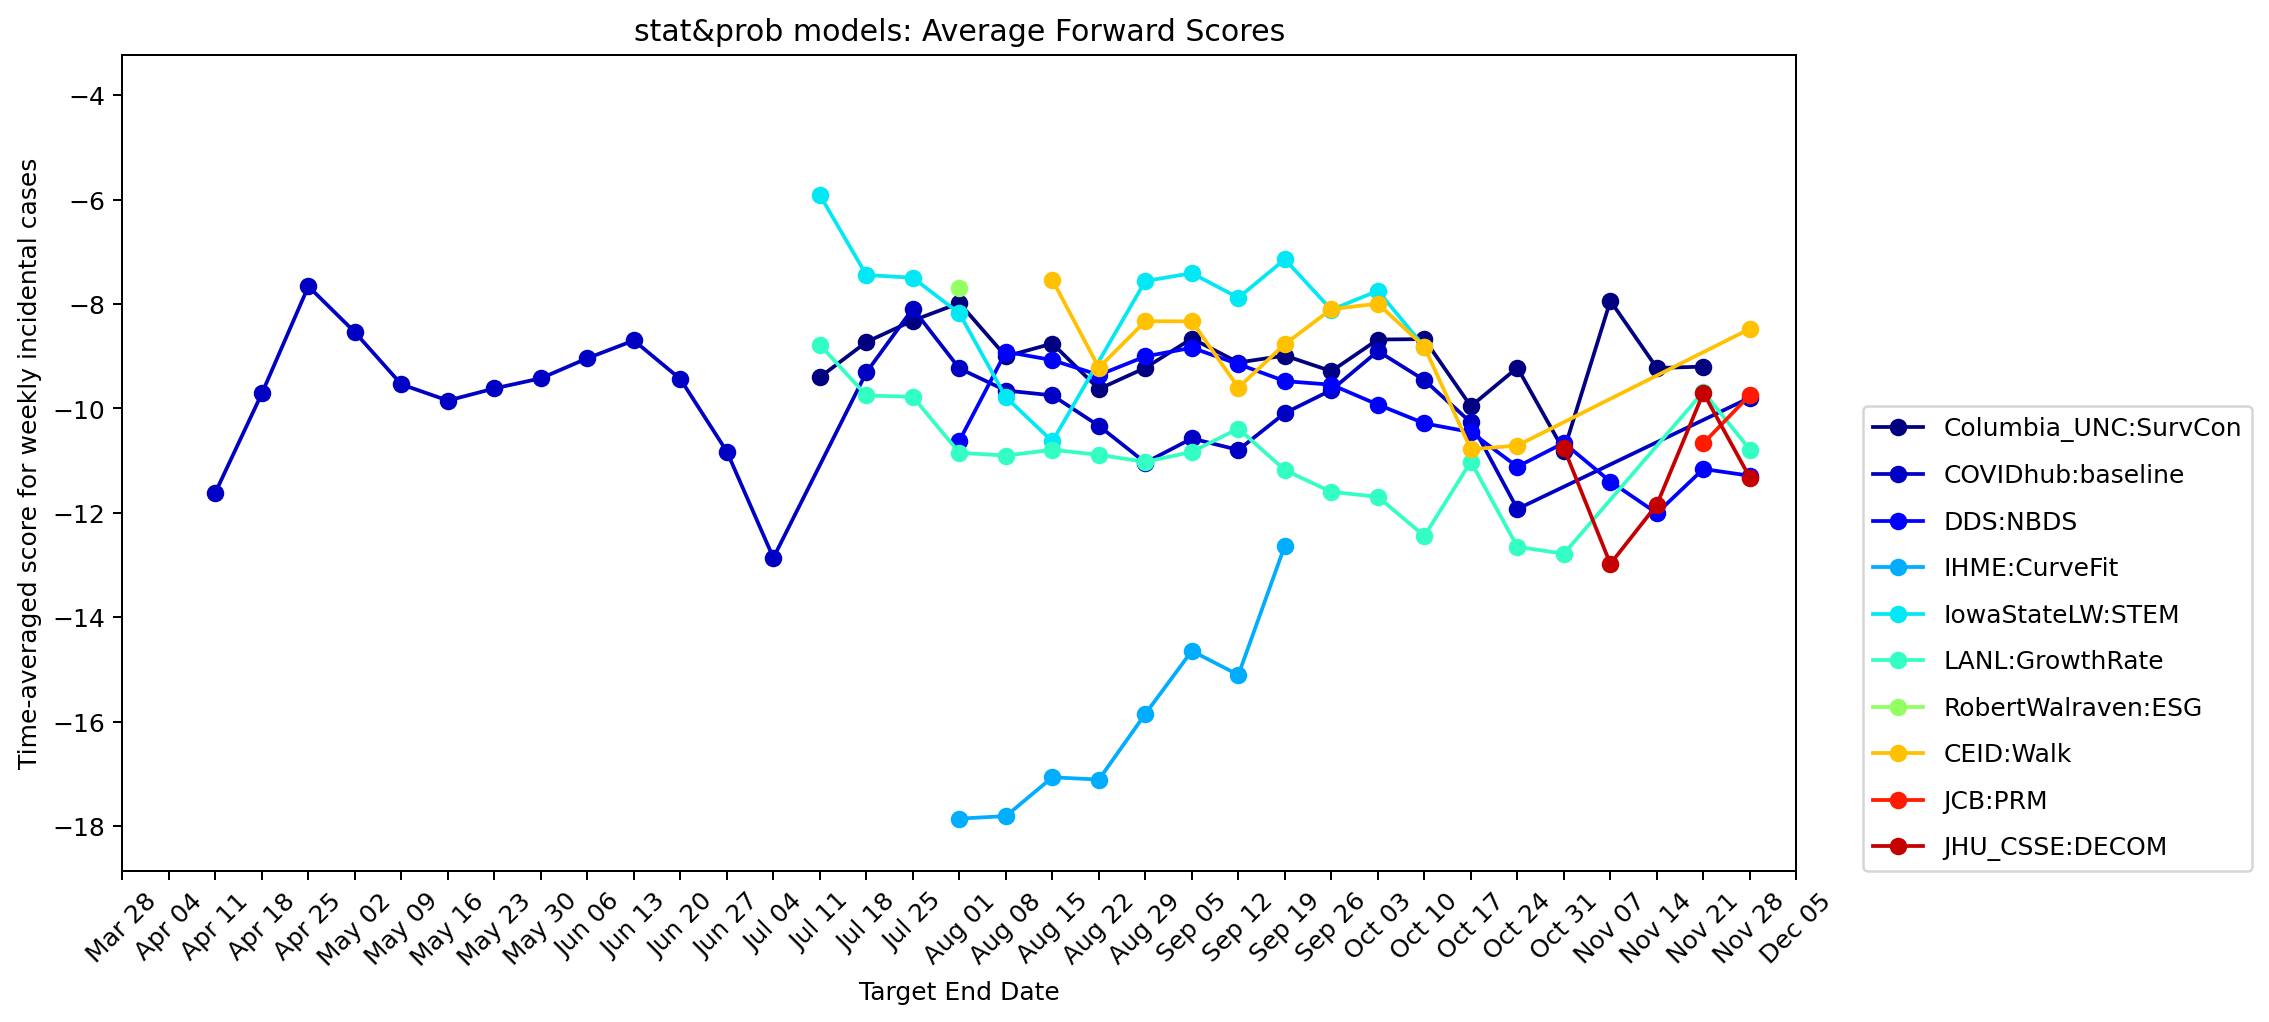

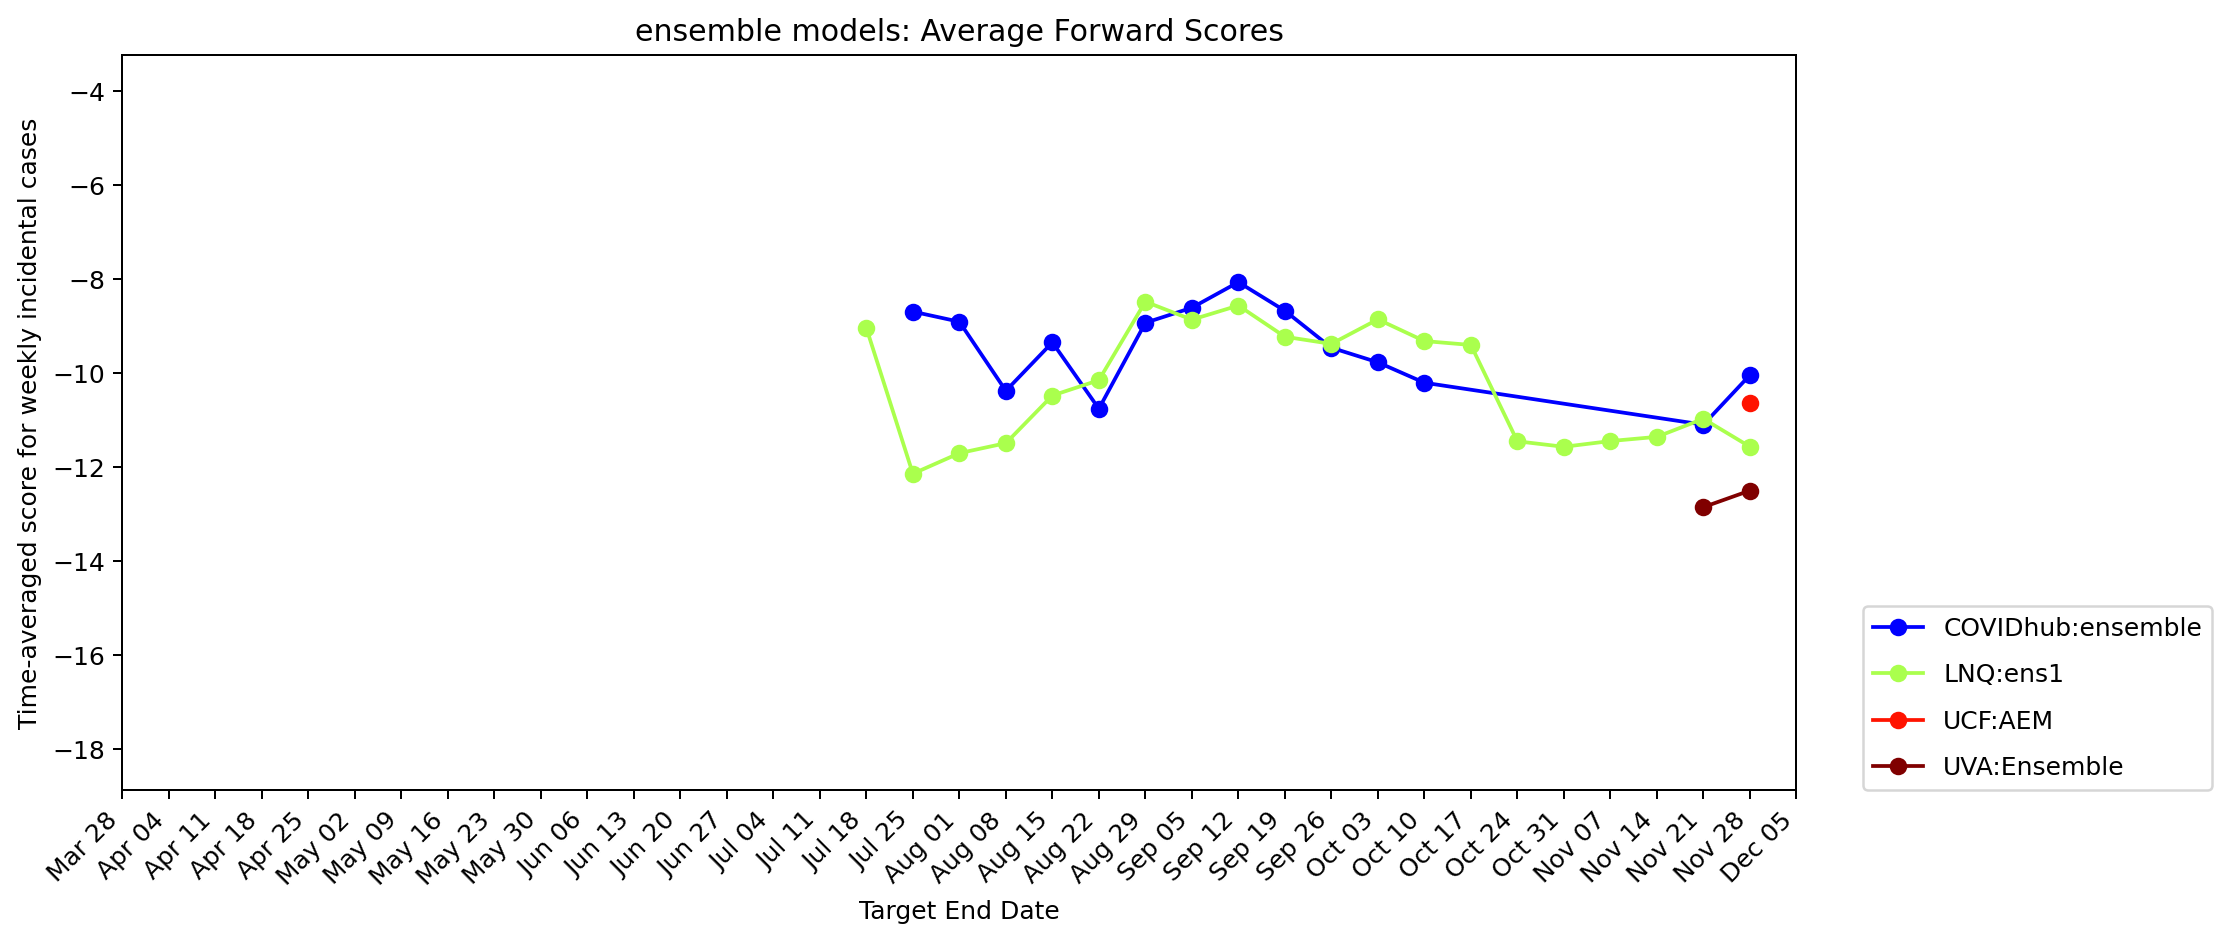

In [57]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [59]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])

remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 21 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), 5.56 KiB | 154.00 KiB/s, done.
From https://github.com/ONYLAB/Scoreboard
 * branch            master     -> FETCH_HEAD
   1c2f389..5990c72  master     -> origin/master
Successfully rebased and updated refs/heads/master.
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Enumerating objects: 132, done.
Counting objects: 100% (132/132), done.
Delta compression using up to 8 threads
Compressing objects: 100% (96/96), done.
Writing objects: 100% (96/96), 14.52 MiB | 7.82 MiB/s, done.
Total 96 (delta 61), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (61/61), completed with 25 local objects.
remote: warning: GH001: Large files detected. You 